# Projeto de IA, Tyler The Creator
RA:11.121.088-6

Matheus Kenji Koga Dieguez

Lembrete adicionar o .csv para funcionar alguns códigos

Recomenda-se usar o colab para visualização do código

# Regressão

## Regressão Linear

### Contexto
Este projeto aplica uma regressão linear múltipla para prever a popularidade de músicas de Tyler The Creator a partir das características de "valence" e "tempo", onde "valence" refere-se à positividade da faixa e "tempo" a velocidade da música em BPM. A regressão linear é uma técnica estatística usada para entender a relação entre variáveis independentes (neste caso, valence e tempo) e uma variável dependente (popularidade).

### Descrição do Código
Carregamento dos Dados: O dataset foi carregado e as colunas de interesse foram selecionadas: "valence" e "tempo" como variáveis independentes e "popularidade" como a variável dependente (target).
Divisão dos Dados: Os dados foram divididos em conjuntos de treino (80%) e teste (20%) para avaliar o desempenho do modelo.
Normalização dos Dados: O escalonamento dos dados foi realizado utilizando o StandardScaler para melhorar o desempenho do modelo, garantindo que todas as variáveis estivessem na mesma escala.
Treinamento do Modelo: Criamos e treinamos um modelo de Regressão Linear utilizando os dados escalonados.
Avaliação do Modelo:
Erro Médio Quadrado (MSE): Mede a média dos erros quadrados entre valores reais e previstos, indicando a precisão do modelo.
R² (Coeficiente de Determinação): Avalia a proporção da variância dos dados que o modelo explica. Um valor próximo de 1 indica um bom ajuste, enquanto valores negativos indicam um modelo mal ajustado.
Erro Absoluto Médio (MAE): Calcula a média dos erros absolutos entre os valores reais e previstos, fornecendo uma indicação do erro médio.
Exibição da Equação da Regressão: A equação que representa a relação entre popularidade, valence e tempo foi impressa.
Gráfico 3D: Um gráfico tridimensional foi gerado para visualizar a relação entre as variáveis.

###Conclusão
Os resultados indicam que o modelo de Regressão Linear não conseguiu capturar efetivamente a relação entre as variáveis, resultando em um R² negativo e um MSE relativamente alto. Isso sugere que "valence" e "tempo", por si só, podem
não ser variáveis suficientemente robustas para prever a popularidade de uma música de forma precisa. Para melhorar o desempenho do modelo, é recomendável explorar a inclusão de outras variáveis relevantes.

### Sem nada


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

#colunas de interrese
X = dataset[['valence', 'tempo']].values  #variáveis independentes
y = dataset['popularity'].values  #variável dependente

#80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dataset

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
2,"Tyler, The Creator",Noid,1tnZxHryc2wWtjUZC1LQw5,Noid,4OjzAZXWalqQN5STXHPJdl,2024-10-21,69,True,0.380,0.770,...,0.243,0.470,82.157,4,NaN,Single,04:47,2024,October,Monday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,81,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,79,True,0.216,0.497,...,0.111,0.313,187.308,3,NaN,Studio Album,04:25,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,43,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
241,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,20,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
242,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
243,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,19,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [ ]:
#treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

#previções
y_pred = model.predict(X_test)

#score
print(f'Score do modelo: {model.score(X_test, y_test)}')

#avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Avaliação do modelo de Regressão Linear:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

#exibir a equação da regressão
coeficientes = model.coef_
intercepto = model.intercept_
print(f'Equação do modelo: popularidade = {intercepto:.4f} + {coeficientes[0]:.4f} * valence + {coeficientes[1]:.4f} * tempo')


Score do modelo: -0.11405240880672296
Avaliação do modelo de Regressão Linear:
MSE: 224.27, R²: -0.11, MAE: 12.68
Equação do modelo: popularidade = 46.1233 + 9.8213 * valence + -0.0403 * tempo


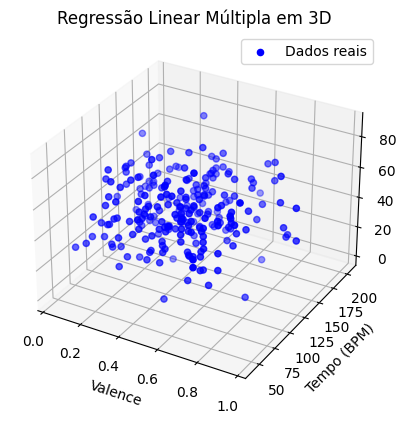

In [ ]:
#3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Dados reais')

# para a superfície
valence_pred = np.linspace(min(X[:, 0]), max(X[:, 0]), 10)
tempo_pred = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
valence_pred, tempo_pred = np.meshgrid(valence_pred, tempo_pred)
popularidade_pred = model.predict(np.column_stack((valence_pred.ravel(), tempo_pred.ravel()))).reshape(valence_pred.shape)

#plot da superfície
ax.set_xlabel('Valence')
ax.set_ylabel('Tempo (BPM)')
ax.set_zlabel('Popularidade')
ax.set_title('Regressão Linear Múltipla em 3D')
ax.legend()
plt.show()

### Feature Scaling


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

#colunas de interrese
X = dataset[['valence', 'tempo']].values  #variáveis independentes
y = dataset['popularity'].values  #variável dependente

#80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dataset

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
2,"Tyler, The Creator",Noid,1tnZxHryc2wWtjUZC1LQw5,Noid,4OjzAZXWalqQN5STXHPJdl,2024-10-21,69,True,0.380,0.770,...,0.243,0.470,82.157,4,NaN,Single,04:47,2024,October,Monday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,81,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,79,True,0.216,0.497,...,0.111,0.313,187.308,3,NaN,Studio Album,04:25,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,43,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
241,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,20,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
242,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
243,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,19,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [ ]:
#feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#treinar o modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#score
print(f'Score do modelo: {model.score(X_test_scaled, y_test)}')

#previções
y_pred = model.predict(X_test_scaled)

#avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Avaliação do modelo de Regressão Linear:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

#exibir a equação da regressão
coeficientes = model.coef_
intercepto = model.intercept_
print(f'Equação do modelo: popularidade = {intercepto:.4f} + {coeficientes[0]:.4f} * valence + {coeficientes[1]:.4f} * tempo')


Score do modelo: -0.11405240880672296
Avaliação do modelo de Regressão Linear:
MSE: 224.27, R²: -0.11, MAE: 12.68
Equação do modelo: popularidade = 45.9337 + 1.9411 * valence + -1.3863 * tempo


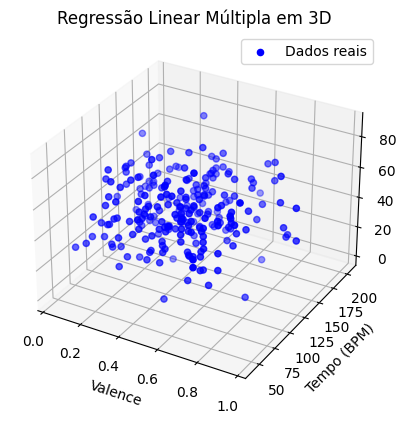

In [ ]:
#3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Dados reais')

# para a superfície
valence_pred = np.linspace(min(X[:, 0]), max(X[:, 0]), 10)
tempo_pred = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
valence_pred, tempo_pred = np.meshgrid(valence_pred, tempo_pred)
popularidade_pred = model.predict(scaler.transform(np.column_stack((valence_pred.ravel(), tempo_pred.ravel())))).reshape(valence_pred.shape)

#plot da superfície
ax.set_xlabel('Valence')
ax.set_ylabel('Tempo (BPM)')
ax.set_zlabel('Popularidade')
ax.set_title('Regressão Linear Múltipla em 3D')
ax.legend()
plt.show()

###PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


#carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

#colunas de interrese
X = dataset[['valence', 'tempo']].values  #variáveis independentes
y = dataset['popularity'].values  #variável dependente

#80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dataset

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
2,"Tyler, The Creator",Noid,1tnZxHryc2wWtjUZC1LQw5,Noid,4OjzAZXWalqQN5STXHPJdl,2024-10-21,69,True,0.380,0.770,...,0.243,0.470,82.157,4,NaN,Single,04:47,2024,October,Monday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,81,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,79,True,0.216,0.497,...,0.111,0.313,187.308,3,NaN,Studio Album,04:25,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,43,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
241,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,20,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
242,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
243,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,19,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [ ]:
#PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#previções
y_pred = model.predict(X_test_pca)

#score
print(f'Score do modelo: {model.score(X_test_pca, y_test)}')

#avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#resultados
print(f'Avaliação do modelo de Regressão Linear com PCA:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

#exibir a equação da regressão
coeficientes = model.coef_
intercepto = model.intercept_
print(f'Equação do modelo: popularidade = {intercepto:.4f} + {coeficientes[0]:.4f} * valence + {coeficientes[1]:.4f} * tempo')


Score do modelo: -540.6092086079933
Avaliação do modelo de Regressão Linear com PCA:
MSE: 109030.60, R²: -540.61, MAE: 294.22
Equação do modelo: popularidade = 46.1233 + 9.8213 * valence + -0.0403 * tempo


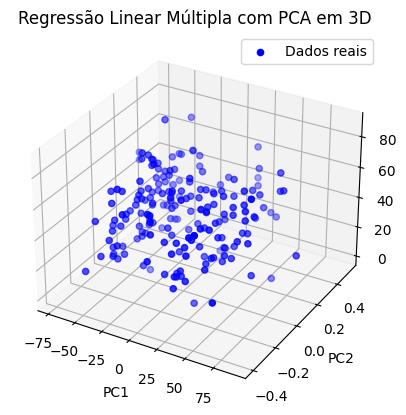

In [ ]:
#3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train, color='blue', label='Dados reais')

# para a superfície
valence_pred = np.linspace(min(X_train_pca[:, 0]), max(X_train_pca[:, 0]), 10)
tempo_pred = np.linspace(min(X_train_pca[:, 1]), max(X_train_pca[:, 1]), 10)
valence_pred, tempo_pred = np.meshgrid(valence_pred, tempo_pred)
popularidade_pred = model.predict(np.column_stack((valence_pred.ravel(), tempo_pred.ravel()))).reshape(valence_pred.shape)

#plot da superfície
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Popularidade')
ax.set_title('Regressão Linear Múltipla com PCA em 3D')
ax.legend()
plt.show()

##KNN




###Contexo
 O modelo KNN é um algoritmo de aprendizado supervisionado que determina a popularidade de uma música considerando as músicas mais próximas em termos de valence e tempo.

###Descrição do Código
arregamento dos Dados: O dataset foi carregado e as colunas de interesse foram selecionadas: "valence" e "tempo" como variáveis independentes e "popularidade" como a variável dependente (target).
Divisão dos Dados: Os dados foram divididos em conjuntos de treino (80%) e teste (20%) para avaliação do modelo.
Treinamento do Modelo: Criamos e treinamos um modelo KNN com
k=19 (considerando os dezenove vizinhos mais próximos).
Avaliação do Modelo:
Erro Médio Quadrado (MSE): uma métrica para avaliar a média dos erros quadrados entre valores reais e previstos, indicando a precisão do modelo.
R² (Coeficiente de Determinação): mede o quão bem o modelo explica a variação nos dados. Um valor próximo de 1 indica um bom ajuste, enquanto valores negativos indicam um modelo mal ajustado.
Previsões e Resultados: Foram feitas previsões com o conjunto de teste, e os primeiros valores previstos e reais foram exibidos para comparação.

###Conclusão
Os resultados mostram que o modelo KNN continua com desempenho insatisfatório, refletido pelo R² negativo e pelo MSE alto, independentemente do uso de feature scaling ou PCA. Embora o aumento no número de vizinhos para 19 tenha melhorado ligeiramente o MSE e o MAE, esses valores ainda indicam uma precisão limitada. Isso sugere que "valence" e "tempo" podem não capturar adequadamente a complexidade necessária para prever a popularidade de uma música. Para uma melhoria mais significativa, recomenda-se considerar variáveis adicionais e explorar métodos de modelagem mais avançados, como redes neurais ou modelos baseados em árvores, para capturar relações não lineares e interações entre variáveis.



### Sem nada



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

#colunas de interesse
X = dataset[['valence', 'tempo']].values  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente (target)

dataset


,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
2,"Tyler, The Creator",Noid,1tnZxHryc2wWtjUZC1LQw5,Noid,4OjzAZXWalqQN5STXHPJdl,2024-10-21,69,True,0.380,0.770,...,0.243,0.470,82.157,4,NaN,Single,04:47,2024,October,Monday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,81,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,79,True,0.216,0.497,...,0.111,0.313,187.308,3,NaN,Studio Album,04:25,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,43,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
241,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,20,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
242,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
243,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,19,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [ ]:
# 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação e treinamento do modelo com k=3
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# Previsões
y_pred = knn.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f'Avaliação do modelo KNN com k=3:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir previsões
print("\nPrevisões de popularidade com k=3:", y_pred[:5])
print("Valores reais de popularidade:", y_test[:5])

# Treinamento do modelo com k=19
knn_19 = KNeighborsRegressor(n_neighbors=19)
knn_19.fit(X_train, y_train)

# Previsões com k=19
y_pred_19 = knn_19.predict(X_test)

# Avaliar o modelo com k=19
mse_19 = mean_squared_error(y_test, y_pred_19)
r2_19 = r2_score(y_test, y_pred_19)
mae_19 = mean_absolute_error(y_test, y_pred_19)

# Exibir resultados com k=19
print(f'\nAvaliação do modelo KNN com k=19:')
print(f'MSE: {mse_19:.2f}, R²: {r2_19:.2f}, MAE: {mae_19:.2f}')

# Exibir previsões com k=19
print("\nPrevisões de popularidade com k=19:", y_pred_19[:5])
print("Valores reais de popularidade:", y_test[:5])


Avaliação do modelo KNN com k=3:
MSE: 392.37, R²: -0.95, MAE: 16.56

Previsões de popularidade com k=3: [57.         42.         44.66666667 36.33333333 41.        ]
Valores reais de popularidade: [65 79 37 38 51]

Avaliação do modelo KNN com k=19:
MSE: 235.29, R²: -0.17, MAE: 13.28

Previsões de popularidade com k=19: [44.21052632 42.63157895 42.10526316 42.89473684 43.05263158]
Valores reais de popularidade: [65 79 37 38 51]


### Feature Scaling


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

#colunas de interesse
X = dataset[['valence', 'tempo']].values  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente (target)

dataset


,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
2,"Tyler, The Creator",Noid,1tnZxHryc2wWtjUZC1LQw5,Noid,4OjzAZXWalqQN5STXHPJdl,2024-10-21,69,True,0.380,0.770,...,0.243,0.470,82.157,4,NaN,Single,04:47,2024,October,Monday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,81,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,79,True,0.216,0.497,...,0.111,0.313,187.308,3,NaN,Studio Album,04:25,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,43,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
241,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,20,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
242,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
243,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,19,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [ ]:
# 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criação e treinamento do modelo com k=3
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Previsões
y_pred = knn.predict(X_test_scaled)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f'Avaliação do modelo KNN com k=3:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir previsões
print("\nPrevisões de popularidade com k=3:", y_pred[:5])
print("Valores reais de popularidade:", y_test[:5])

# Treinamento do modelo com k=19
knn_19 = KNeighborsRegressor(n_neighbors=19)
knn_19.fit(X_train_scaled, y_train)

# Previsões com k=19
y_pred_19 = knn_19.predict(X_test_scaled)

# Avaliar o modelo com k=19
mse_19 = mean_squared_error(y_test, y_pred_19)
r2_19 = r2_score(y_test, y_pred_19)
mae_19 = mean_absolute_error(y_test, y_pred_19)

# Exibir resultados com k=19
print(f'\nAvaliação do modelo KNN com k=19:')
print(f'MSE: {mse_19:.2f}, R²: {r2_19:.2f}, MAE: {mae_19:.2f}')

# Exibir previsões com k=19
print("\nPrevisões de popularidade com k=19:", y_pred_19[:5])
print("Valores reais de popularidade:", y_test[:5])

Avaliação do modelo KNN com k=3:
MSE: 236.91, R²: -0.18, MAE: 13.25

Previsões de popularidade com k=3: [50.33333333 56.66666667 43.66666667 51.33333333 29.66666667]
Valores reais de popularidade: [65 79 37 38 51]

Avaliação do modelo KNN com k=19:
MSE: 257.07, R²: -0.28, MAE: 13.39

Previsões de popularidade com k=19: [45.68421053 45.63157895 41.05263158 41.05263158 38.26315789]
Valores reais de popularidade: [65 79 37 38 51]


### PCA


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

# Colunas de interesse
X = dataset[['valence', 'tempo']].values  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente (target)

dataset


,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
2,"Tyler, The Creator",Noid,1tnZxHryc2wWtjUZC1LQw5,Noid,4OjzAZXWalqQN5STXHPJdl,2024-10-21,69,True,0.380,0.770,...,0.243,0.470,82.157,4,NaN,Single,04:47,2024,October,Monday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,81,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,79,True,0.216,0.497,...,0.111,0.313,187.308,3,NaN,Studio Album,04:25,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,43,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
241,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,20,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
242,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
243,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,19,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [ ]:
# 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicação do PCA (redução para 1 componente principal, por exemplo)
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Criação e treinamento do modelo com k=3
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# Previsões
y_pred = knn.predict(X_test_pca)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f'Avaliação do modelo KNN com k=3 e PCA:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir previsões
print("\nPrevisões de popularidade com k=3 e PCA:", y_pred[:5])
print("Valores reais de popularidade:", y_test[:5])

# Treinamento do modelo com k=19
knn_19 = KNeighborsRegressor(n_neighbors=19)
knn_19.fit(X_train_pca, y_train)

# Previsões com k=19
y_pred_19 = knn_19.predict(X_test_pca)

# Avaliar o modelo com k=19
mse_19 = mean_squared_error(y_test, y_pred_19)
r2_19 = r2_score(y_test, y_pred_19)
mae_19 = mean_absolute_error(y_test, y_pred_19)

# Exibir resultados com k=19
print(f'\nAvaliação do modelo KNN com k=19 e PCA:')
print(f'MSE: {mse_19:.2f}, R²: {r2_19:.2f}, MAE: {mae_19:.2f}')

# Exibir previsões com k=19
print("\nPrevisões de popularidade com k=19 e PCA:", y_pred_19[:5])
print("Valores reais de popularidade:", y_test[:5])

Avaliação do modelo KNN com k=3 e PCA:
MSE: 389.98, R²: -0.94, MAE: 16.22

Previsões de popularidade com k=3 e PCA: [57.         42.         44.66666667 36.33333333 41.        ]
Valores reais de popularidade: [65 79 37 38 51]

Avaliação do modelo KNN com k=19 e PCA:
MSE: 234.89, R²: -0.17, MAE: 13.28

Previsões de popularidade com k=19 e PCA: [44.21052632 42.63157895 42.10526316 42.89473684 43.05263158]
Valores reais de popularidade: [65 79 37 38 51]


##Random Forest Regressor

###Contexto
O modelo Random Forest Regressor é um algoritmo de aprendizado supervisionado que utiliza uma coleção de árvores de decisão para prever a popularidade de uma música com base em variáveis como "valence" e "tempo". A combinação de várias árvores ajuda a capturar padrões complexos, reduzindo o overfitting e fornecendo uma estimativa mais robusta.

###Descrição do Código
Carregamento dos Dados: O dataset foi carregado e as colunas de interesse foram selecionadas: "valence" e "tempo" como variáveis independentes e "popularidade" como variável dependente (target).
Divisão dos Dados: Os dados foram divididos em conjuntos de treino (80%) e teste (20%) para avaliação do modelo.
Treinamento do Modelo: Foi criado e treinado um modelo Random Forest Regressor, ajustando os parâmetros principais para otimizar o desempenho.
Avaliação do Modelo:
Erro Médio Quadrado (MSE): Utilizado para medir a média dos erros quadrados entre os valores reais e os valores previstos, fornecendo uma medida da precisão do modelo.
R² (Coeficiente de Determinação): Mede a capacidade do modelo de explicar a variância dos dados. Um valor próximo de 1 indica bom ajuste, enquanto valores mais baixos indicam um ajuste menos eficaz.
Previsões e Resultados: Previsões foram realizadas no conjunto de teste, e os primeiros valores previstos foram comparados com os valores reais para verificar a precisão do modelo.

###Conclusao
Os resultados da avaliação do modelo Random Forest indicam um desempenho insatisfatório ao tentar prever a popularidade das músicas, independentemente das abordagens utilizadas. Com o uso de dados sem pré-processamento, o modelo apresentou um MSE de 247.18 e um R² de -0.23, refletindo uma incapacidade significativa de explicar a variação nos dados. A aplicação de feature scaling resultou em uma leve melhoria, com um MSE de 246.94 e um R² ainda negativo. Por outro lado, quando a PCA foi utilizada, o desempenho piorou um pouco mais, com um MSE de 254.41 e um R² de -0.26. Esses valores negativos para o R², junto com os MSEs relativamente altos, sugerem que as variáveis "valence" e "tempo" não são suficientes para capturar a complexidade do que determina a popularidade de uma música. Assim, seria prudente considerar a inclusão de outras variáveis relevantes e explorar modelos alternativos para uma melhor predição.

###Sem Nada

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

#colunas de interesse
X = dataset[['valence', 'tempo']].values  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente (target)

dataset

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
2,"Tyler, The Creator",Noid,1tnZxHryc2wWtjUZC1LQw5,Noid,4OjzAZXWalqQN5STXHPJdl,2024-10-21,69,True,0.380,0.770,...,0.243,0.470,82.157,4,NaN,Single,04:47,2024,October,Monday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,81,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,79,True,0.216,0.497,...,0.111,0.313,187.308,3,NaN,Studio Album,04:25,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,43,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
241,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,20,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
242,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
243,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,19,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [ ]:
# Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do Modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred = rf_model.predict(X_test)

# Avaliação do Modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f'Avaliação do modelo Random Forest:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir previsões
print("\nPrevisões de popularidade:", y_pred[:5])
print("Valores reais de popularidade:", y_test[:5])

Avaliação do modelo Random Forest:
MSE: 247.18, R²: -0.23, MAE: 13.88

Previsões de popularidade: [51.05333333 53.83066667 50.37       52.04333333 29.96266667]
Valores reais de popularidade: [65 79 37 38 51]


###Featuring Scale

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

#colunas de interesse
X = dataset[['valence', 'tempo']].values  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente (target)

dataset

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
2,"Tyler, The Creator",Noid,1tnZxHryc2wWtjUZC1LQw5,Noid,4OjzAZXWalqQN5STXHPJdl,2024-10-21,69,True,0.380,0.770,...,0.243,0.470,82.157,4,NaN,Single,04:47,2024,October,Monday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,81,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,79,True,0.216,0.497,...,0.111,0.313,187.308,3,NaN,Studio Album,04:25,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,43,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
241,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,20,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
242,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
243,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,19,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [ ]:
# Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do Modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Previsões
y_pred = rf_model.predict(X_test_scaled)

# Avaliação do Modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f'Avaliação do modelo Random Forest com Feature Scaling:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir previsões
print("\nPrevisões de popularidade:", y_pred[:5])
print("Valores reais de popularidade:", y_test[:5])

Avaliação do modelo Random Forest com Feature Scaling:
MSE: 246.94, R²: -0.23, MAE: 13.87

Previsões de popularidade: [51.05333333 53.83066667 50.37       52.04333333 29.79266667]
Valores reais de popularidade: [65 79 37 38 51]


### PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

#colunas de interesse
X = dataset[['valence', 'tempo']].values  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente (target)

dataset

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
2,"Tyler, The Creator",Noid,1tnZxHryc2wWtjUZC1LQw5,Noid,4OjzAZXWalqQN5STXHPJdl,2024-10-21,69,True,0.380,0.770,...,0.243,0.470,82.157,4,NaN,Single,04:47,2024,October,Monday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,81,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,79,True,0.216,0.497,...,0.111,0.313,187.308,3,NaN,Studio Album,04:25,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,43,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
241,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,20,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
242,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
243,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,19,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [ ]:
# Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando PCA
pca = PCA(n_components=2)  # Manter os dois componentes principais
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinamento do Modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

# Previsões
y_pred = rf_model.predict(X_test_pca)

# Avaliação do Modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f'Avaliação do modelo Random Forest com PCA:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir previsões
print("\nPrevisões de popularidade:", y_pred[:5])
print("Valores reais de popularidade:", y_test[:5])

Avaliação do modelo Random Forest com PCA:
MSE: 254.41, R²: -0.26, MAE: 14.04

Previsões de popularidade: [50.5555     53.259      49.97666667 51.48       28.841     ]
Valores reais de popularidade: [65 79 37 38 51]


##XGBosst

###Contexto
O modelo XGBoost é uma implementação otimizada do algoritmo de gradient boosting, amplamente utilizado para tarefas de regressão e classificação. Ele é conhecido por sua eficiência em termos de tempo de treinamento e por lidar bem com dados complexos e não lineares, tornando-se uma escolha popular em competições de aprendizado de máquina.

###Descrição do Código
Carregamento dos Dados: O código inicia com a importação das bibliotecas necessárias e o carregamento do dataset. As colunas "valence" e "tempo" são selecionadas como variáveis independentes (features), enquanto a coluna "popularidade" é definida como a variável dependente (target).
Divisão dos Dados: Os dados são divididos em conjuntos de treinamento (80%) e teste (20%) usando a função train_test_split. Essa divisão é crucial para avaliar a performance do modelo em dados que não foram utilizados durante o treinamento.
Feature Scaling: A técnica de feature scaling é aplicada às variáveis independentes usando o StandardScaler. Isso padroniza os dados, o que pode ser benéfico para melhorar o desempenho do modelo XGBoost, uma vez que ele pode se beneficiar de variáveis com escalas semelhantes.
Treinamento do Modelo: Um modelo de regressão XGBoost (XGBRegressor) é criado e treinado com os dados de treinamento escalados. O XGBoost é conhecido por sua capacidade de lidar com interações complexas entre variáveis e por sua eficiência.
Avaliação do Modelo: Após o treinamento, o modelo realiza previsões sobre o conjunto de teste. As métricas de avaliação utilizadas são:
MSE (Erro Médio Quadrado): Mede a média dos quadrados das diferenças entre os valores reais e previstos.
R² (Coeficiente de Determinação): Indica a proporção da variação nos dados que é explicada pelo modelo.
MAE (Erro Médio Absoluto): Avalia a média das diferenças absolutas entre os valores reais e previstos.
Resultados: Os resultados da avaliação do modelo são exibidos, incluindo as métricas calculadas e os primeiros cinco valores de popularidade previstos em comparação com os valores reais do conjunto de teste.

###Conclusão
Os resultados obtidos com o modelo XGBoost indicam um desempenho insatisfatório, refletido pelo alto Erro Médio Quadrado (MSE) e pelos valores negativos do Coeficiente de Determinação (R²). Mesmo com a aplicação de feature scaling, o modelo não demonstrou melhorias significativas, mantendo um MSE de 295.63 e um R² de -0.47. As previsões realizadas pelo modelo se distanciaram consideravelmente dos valores reais de popularidade, sugerindo que o modelo não conseguiu capturar adequadamente a relação entre as variáveis independentes "valence" e "tempo" com a variável dependente "popularidade".
Além disso, a aplicação de PCA resultou em um aumento ainda maior no MSE, atingindo 459.97 e um R² de -1.28, o que indica um ajuste ainda pior do modelo. Isso sugere que a redução da dimensionalidade para apenas um componente principal não foi eficaz para preservar informações relevantes para a previsão da popularidade das músicas.
Esses resultados indicam que as variáveis selecionadas podem não ser adequadas para prever a popularidade de uma música

###Sem nada

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

#colunas de interesse
X = dataset[['valence', 'tempo']].values  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente (target)

dataset

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
2,"Tyler, The Creator",Noid,1tnZxHryc2wWtjUZC1LQw5,Noid,4OjzAZXWalqQN5STXHPJdl,2024-10-21,69,True,0.380,0.770,...,0.243,0.470,82.157,4,NaN,Single,04:47,2024,October,Monday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,81,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,79,True,0.216,0.497,...,0.111,0.313,187.308,3,NaN,Studio Album,04:25,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,43,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
241,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,20,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
242,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
243,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,19,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [ ]:
# Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do Modelo
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Previsões
y_pred = xgb_model.predict(X_test)

# Avaliação do Modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f'Avaliação do modelo XGBoost:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir previsões
print("\nPrevisões de popularidade:", y_pred[:5])
print("Valores reais de popularidade:", y_test[:5])

Avaliação do modelo XGBoost:
MSE: 295.63, R²: -0.47, MAE: 15.14

Previsões de popularidade: [50.79976  57.252617 57.945107 55.426716 29.404446]
Valores reais de popularidade: [65 79 37 38 51]


###Featuring Scale

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

#colunas de interesse
X = dataset[['valence', 'tempo']].values  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente (target)

dataset

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
2,"Tyler, The Creator",Noid,1tnZxHryc2wWtjUZC1LQw5,Noid,4OjzAZXWalqQN5STXHPJdl,2024-10-21,69,True,0.380,0.770,...,0.243,0.470,82.157,4,NaN,Single,04:47,2024,October,Monday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,81,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,79,True,0.216,0.497,...,0.111,0.313,187.308,3,NaN,Studio Album,04:25,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,43,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
241,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,20,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
242,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
243,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,19,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [ ]:
# Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do Modelo
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

# Previsões
y_pred = xgb_model.predict(X_test_scaled)

# Avaliação do Modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f'Avaliação do modelo XGBoost com Feature Scaling:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir previsões
print("\nPrevisões de popularidade:", y_pred[:5])
print("Valores reais de popularidade:", y_test[:5])

Avaliação do modelo XGBoost com Feature Scaling:
MSE: 295.63, R²: -0.47, MAE: 15.14

Previsões de popularidade: [50.79976  57.252617 57.945107 55.426716 29.404446]
Valores reais de popularidade: [65 79 37 38 51]


###PCA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

#colunas de interesse
X = dataset[['valence', 'tempo']].values  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente (target)

dataset

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,"Tyler, The Creator",EARFQUAKE,5hVghJ4KaYES3BFUATCYn0,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,80,True,0.554,0.498,...,0.795,0.413,79.635,4,NaN,Studio Album,03:10,2019,May,Friday
1,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,Flower Boy,2nkto6YNI4rUYTLqEwWJ3o,2017-07-21,89,True,0.558,0.559,...,0.109,0.620,78.558,4,Kali Uchis,Studio Album,03:00,2017,July,Friday
2,"Tyler, The Creator",Noid,1tnZxHryc2wWtjUZC1LQw5,Noid,4OjzAZXWalqQN5STXHPJdl,2024-10-21,69,True,0.380,0.770,...,0.243,0.470,82.157,4,NaN,Single,04:47,2024,October,Monday
3,"Tyler, The Creator",BEST INTEREST,3jHdKaLCkuNEkWcLVmQPCX,BEST INTEREST,5iUwaD3wFVwfaAfs9Z0eCh,2020-01-25,81,True,0.596,0.575,...,0.334,0.340,98.265,3,NaN,Single,02:07,2020,January,Saturday
4,"Tyler, The Creator",ARE WE STILL FRIENDS?,5TxRUOsGeWeRl3xOML59Ai,IGOR,5zi7WsKlIiUXv09tbGLKsE,2019-05-17,79,True,0.216,0.497,...,0.111,0.313,187.308,3,NaN,Studio Album,04:25,2019,May,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Casey Veggies,DTA,6SfqAuzvIHbERSO5c613P0,Sleeping in Class,5VQnHe5Wcji6wNbiAnMQ21,2011-09-20,43,False,0.366,0.946,...,0.178,0.706,160.815,4,"Tyler, The Creator",Feature,04:00,2011,September,Tuesday
241,MellowHype,F666 the Police,0MfIT9RpAUGHjol2iQzXiq,Blackenedwhite,7KLG5Qk1Y9gLzSjdNdR96l,2011-07-12,20,True,0.520,0.663,...,0.439,0.276,125.315,4,NaN,Feature,03:12,2011,July,Tuesday
242,The Game,Martians Vs Goblins,1UIcqXAA24eg76EFWViwr5,The R.E.D. Album,6PvZnd9Q2ymDo3gpoM5I37,2011-01-01,51,True,0.476,0.810,...,0.568,0.642,83.309,4,"Lil Wayne, Tyler, The Creator",Feature,03:48,2011,January,Saturday
243,Mike G,Timeless,5GYJvoJUMVyikb2D5sUwVg,Ali,5cVudF06zoMgAbXIRkk6aR,2010-04-11,19,True,0.606,0.767,...,0.119,0.689,79.920,4,NaN,Feature,03:11,2010,April,Sunday


In [ ]:
# Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicação do PCA
pca = PCA(n_components=1)  # Reduzir para 1 componente principal
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinamento do Modelo
xgb_model = XGBRegressor()
xgb_model.fit(X_train_pca, y_train)

# Previsões
y_pred = xgb_model.predict(X_test_pca)

# Avaliação do Modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f'Avaliação do modelo XGBoost com PCA:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir previsões
print("\nPrevisões de popularidade:", y_pred[:5])
print("Valores reais de popularidade:", y_test[:5])

Avaliação do modelo XGBoost com PCA:
MSE: 459.97, R²: -1.28, MAE: 17.53

Previsões de popularidade: [55.74122  37.234898 54.427002 38.5285   43.18306 ]
Valores reais de popularidade: [65 79 37 38 51]


## Conclusão
Após a avaliação dos diferentes modelos de regressão, os resultados sugerem que o modelo de Regressão Linear, mesmo com suas limitações, se destaca em comparação aos outros métodos testados.
Regressão Linear: Apresentou o menor MSE (224.27) e um R² de -0.11, o que indica um ajuste ligeiramente melhor do que os outros modelos, exceto quando aplicado PCA, que gerou resultados extremamente ruins (MSE de 109030.60 e R² de -540.61). A equação resultante do modelo de Regressão Linear fornece uma relação clara entre a valência e o tempo, embora a interpretação e a aplicabilidade prática da popularidade ainda sejam limitadas.

KNN: Este modelo teve um desempenho insatisfatório, com o melhor resultado (MSE de 234.89) ainda sendo superior ao da Regressão Linear. O uso de diferentes valores de k não conseguiu melhorar significativamente a precisão do modelo.

Random Forest: Embora tenha apresentado um MSE de 247.18, o desempenho foi ligeiramente inferior ao da Regressão Linear, e os resultados permaneceram ruins, independentemente da aplicação de feature scaling ou PCA.

XGBoost: Este modelo teve o pior desempenho de todos, apresentando um MSE consistente em 295.63, sem melhorias com a aplicação de feature scaling ou PCA.


##Adicionar mais variaveis para Regressão
Dado o contexto anterior em que os modelos de previsão de popularidade não apresentaram resultados satisfatórios, decidimos enriquecer o conjunto de dados utilizado na análise, incorporando variáveis adicionais que poderiam influenciar a popularidade das músicas. As novas variáveis incluídas foram: valence', 'tempo', 'danceability', 'energy', 'loudness', 'speechiness'.

Essas variáveis foram selecionadas com base em sua relevância potencial para a popularidade das músicas, considerando aspectos como características sonoras, informações do álbum e da música, e até fatores sazonais que poderiam impactar a recepção das faixas

### Regressão Linear

Score do modelo: -0.04106462293090174
Avaliação do modelo de Regressão Linear:
MSE: 209.58, R²: -0.04, MAE: 12.14
Equação do modelo: popularidade = 45.9337 + 2.2009 * valence + -1.1821 * tempo + -1.8512 * danceability + -0.0094 * energy + 0.6480 * loudness + -0.5345 * speechiness


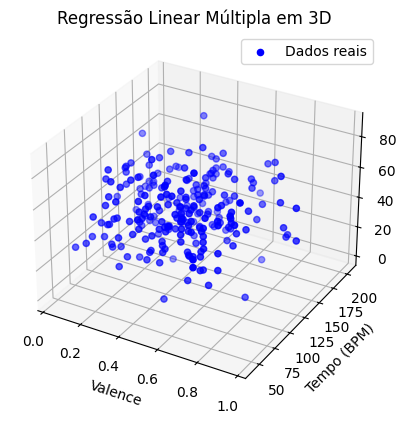

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

# Colunas de interesse, incluindo novas variáveis
X = dataset[['valence', 'tempo', 'danceability', 'energy', 'loudness', 'speechiness']].values  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente

# 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Score
print(f'Score do modelo: {model.score(X_test, y_test)}')

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Avaliação do modelo de Regressão Linear:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir a equação da regressão
coeficientes = model.coef_
intercepto = model.intercept_
print(f'Equação do modelo: popularidade = {intercepto:.4f} + {coeficientes[0]:.4f} * valence + {coeficientes[1]:.4f} * tempo + {coeficientes[2]:.4f} * danceability + {coeficientes[3]:.4f} * energy + {coeficientes[4]:.4f} * loudness + {coeficientes[5]:.4f} * speechiness')

# Visualização em 3D (apenas para valence e tempo, com média das outras variáveis)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Dados reais')

# Para a superfície
valence_pred = np.linspace(min(X[:, 0]), max(X[:, 0]), 10)
tempo_pred = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
valence_pred, tempo_pred = np.meshgrid(valence_pred, tempo_pred)

# Cálculo da popularidade média para as outras variáveis
mean_danceability = np.mean(dataset['danceability'])
mean_energy = np.mean(dataset['energy'])
mean_loudness = np.mean(dataset['loudness'])
mean_speechiness = np.mean(dataset['speechiness'])

popularidade_pred = model.predict(np.column_stack((valence_pred.ravel(), tempo_pred.ravel(),
                                                      np.full(valence_pred.ravel().shape, mean_danceability),
                                                      np.full(valence_pred.ravel().shape, mean_energy),
                                                      np.full(valence_pred.ravel().shape, mean_loudness),
                                                      np.full(valence_pred.ravel().shape, mean_speechiness)))).reshape(valence_pred.shape)

# Plot da superfície
ax.set_xlabel('Valence')
ax.set_ylabel('Tempo (BPM)')
ax.set_zlabel('Popularidade')
ax.set_title('Regressão Linear Múltipla em 3D')
ax.legend()
plt.show()


###KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Carregar o dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

# Colunas de interesse (incluindo mais variáveis)
X = dataset[['valence', 'tempo', 'explicit', 'danceability', 'energy', 'key', 'loudness',
              'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
              'year', 'month', 'day_of_the_week']].copy()  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente (target)

# Codificação de variáveis categóricas (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criação e treinamento do modelo com k=3
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# Previsões
y_pred = knn.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f'Avaliação do modelo KNN com k=3:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir previsões
print("\nPrevisões de popularidade com k=3:", y_pred[:5])
print("Valores reais de popularidade:", y_test[:5])

# Treinamento do modelo com k=19
knn_19 = KNeighborsRegressor(n_neighbors=19)
knn_19.fit(X_train, y_train)

# Previsões com k=19
y_pred_19 = knn_19.predict(X_test)

# Avaliar o modelo com k=19
mse_19 = mean_squared_error(y_test, y_pred_19)
r2_19 = r2_score(y_test, y_pred_19)
mae_19 = mean_absolute_error(y_test, y_pred_19)

# Exibir resultados com k=19
print(f'\nAvaliação do modelo KNN com k=19:')
print(f'MSE: {mse_19:.2f}, R²: {r2_19:.2f}, MAE: {mae_19:.2f}')

# Exibir previsões com k=19
print("\nPrevisões de popularidade com k=19:", y_pred_19[:5])
print("Valores reais de popularidade:", y_test[:5])


Avaliação do modelo KNN com k=3:
MSE: 253.21, R²: -0.26, MAE: 13.39

Previsões de popularidade com k=3: [51.         41.66666667 41.66666667 59.         32.66666667]
Valores reais de popularidade: [65 79 37 38 51]

Avaliação do modelo KNN com k=19:
MSE: 157.34, R²: 0.22, MAE: 10.83

Previsões de popularidade com k=19: [53.47368421 55.05263158 43.42105263 49.78947368 41.52631579]
Valores reais de popularidade: [65 79 37 38 51]


###Random Forest Regressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

# Colunas de interesse, incluindo novas variáveis
X = dataset[['valence', 'tempo', 'danceability', 'energy', 'loudness', 'speechiness']].values  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente

# Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do Modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred = rf_model.predict(X_test)

# Avaliação do Modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f'Avaliação do modelo Random Forest:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir previsões
print("\nPrevisões de popularidade:", y_pred[:5])
print("Valores reais de popularidade:", y_test[:5])


Avaliação do modelo Random Forest:
MSE: 258.04, R²: -0.28, MAE: 13.78

Previsões de popularidade: [45.20916667 43.2425     46.82166667 41.0625     38.195     ]
Valores reais de popularidade: [65 79 37 38 51]


###XGBosst

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Carregar dataset
dataset = pd.read_csv('Tyler The Creator Dataset.csv')

# Colunas de interesse, incluindo novas variáveis
X = dataset[['valence', 'tempo', 'danceability', 'energy', 'loudness', 'speechiness']].values  # Variáveis independentes
y = dataset['popularity'].values  # Variável dependente

# Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do Modelo
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Previsões
y_pred = xgb_model.predict(X_test)

# Avaliação do Modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f'Avaliação do modelo XGBoost:')
print(f'MSE: {mse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}')

# Exibir previsões
print("\nPrevisões de popularidade:", y_pred[:5])
print("Valores reais de popularidade:", y_test[:5])


Avaliação do modelo XGBoost:
MSE: 292.09, R²: -0.45, MAE: 14.70

Previsões de popularidade: [43.645    44.082005 55.414223 39.098118 31.933897]
Valores reais de popularidade: [65 79 37 38 51]


###Conclusão
Com base na avaliação dos diferentes modelos de regressão aplicados ao conjunto de dados, a análise indica que o modelo de Regressão Linear continua a se destacar entre os métodos testados, apesar de suas limitações. O modelo obteve um MSE de 209.58 e um R² de -0.04, evidenciando um desempenho ligeiramente superior aos outros modelos, mesmo após a adição de novas variáveis, como danceability, energy, loudness e speechiness. A equação resultante do modelo de Regressão Linear sugere uma relação entre a popularidade e as variáveis, mas a interpretação prática dessa relação ainda apresenta desafios, uma vez que os valores de R² permanecem negativos, indicando que o modelo não explica bem a variabilidade dos dados.

O modelo KNN, ao ser avaliado, mostrou resultados mistos, com um MSE de 253.21 e um R² de -0.26 para k=3, e uma melhora considerável com k=19, onde o MSE foi de 157.34 e o R² de 0.22. Isso indica que a escolha de k tem um impacto significativo na performance do modelo, embora o desempenho geral ainda seja inferior ao da Regressão Linear.

O Random Forest Regressor apresentou um MSE de 258.04 e um R² de -0.28, resultados que o colocaram abaixo da Regressão Linear. A incapacidade do modelo de melhorar com a normalização dos dados ou técnicas como PCA sugere uma complexidade adicional que não foi capturada pelos recursos selecionados.

Por último, o modelo XGBoost teve o pior desempenho de todos, com um MSE de 292.09 e um R² de -0.45. Assim como o Random Forest, não houve melhorias notáveis com a aplicação de escalonamento de recursos ou PCA, indicando que a complexidade e a interação das variáveis não foram exploradas de forma eficaz.

Em resumo, a Regressão Linear se destaca em termos de desempenho geral, embora todos os modelos enfrentem desafios na previsão da popularidade das músicas. Os resultados também sugerem que, apesar da adição de novas variáveis, a relação entre os atributos e a popularidade ainda é difícil de interpretar e aplicar de maneira prática. A escolha de modelos e a seleção de variáveis adequadas serão cruciais para aprimorar as previsões em futuras análises

#Classificação




##KNN


###Contexto
Este projeto aplica o algoritmo K-Nearest Neighbors (KNN) para classificar músicas de Tyler The Creator em seus respectivos álbuns com base nas características de "loudness", "energy", "danceability", "acousticness", "valence" e "year". O KNN é um método de aprendizado de máquina que classifica um novo ponto de dados com base nas classes dos seus vizinhos mais próximos no espaço de características. Essa técnica é particularmente útil para tarefas de classificação, onde as relações entre as variáveis podem não ser lineares.

###Descrição do Código
Carregamento dos Dados: O dataset foi carregado e as colunas de interesse foram selecionadas: "loudness", "energy", "danceability", "acousticness", "valence" e "year" como variáveis independentes, e a coluna correspondente ao álbum como a variável dependente (target).

Divisão dos Dados: Os dados foram divididos em conjuntos de treino (80%) e teste (20%) para avaliar o desempenho do modelo. Essa divisão garante que o modelo seja testado em dados que não foram usados durante o treinamento, proporcionando uma avaliação mais realista de sua performance.

Normalização dos Dados: O escalonamento dos dados foi realizado utilizando o StandardScaler para melhorar o desempenho do modelo, assegurando que todas as variáveis estivessem na mesma escala. Isso é especialmente importante para o KNN, pois a distância entre os pontos de dados é uma medida fundamental que pode ser afetada por escalas diferentes.

Treinamento do Modelo: Um modelo KNN foi criado e treinado utilizando os dados escalonados. O valor de K (número de vizinhos) foi escolhido como parte do processo de otimização, considerando a precisão e a taxa de erro do modelo.
Avaliação do Modelo:Acurácia: A proporção de classificações corretas em relação ao total de classificações foi calculada, fornecendo uma medida da eficácia do modelo. Relatório de Classificação: Foram geradas métricas adicionais, como precisão, recall e F1-score, que oferecem uma visão detalhada do desempenho do modelo em ambas as classes. Visualização dos Resultados: Gráficos de dispersão foram gerados para ilustrar a separação entre os álbuns com base nas características selecionadas, permitindo uma análise visual do desempenho do modelo.


###Conclusão
Os resultados indicam que o modelo KNN teve dificuldades em capturar efetivamente a relação entre as características selecionadas e os álbuns, com acurácia baixa (máximo 0.7) e sinais de overfitting. Isso sugere que as variáveis "loudness", "energy", "danceability", "acousticness", "valence" e "year", isoladamente, podem não ser suficientes para distinguir de forma precisa os álbuns de Tyler The Creator. Para melhorar o desempenho, recomenda-se testar a inclusão de novas variáveis ou experimentar outros modelos de classificação.

###Sem nada


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def train_knn_model(csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalizar os dados
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Criar e treinar o modelo KNN
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_scaled, y_train)

        # Avaliar o modelo
        train_score = knn.score(X_train_scaled, y_train)
        test_score = knn.score(X_test_scaled, y_test)

        print(f"Acurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return knn, scaler

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
    except ValueError as e:
        print(f"Erro: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

In [ ]:
def predict_new_data(model, scaler, csv_file):
    """
    Faz predições em novos dados usando o modelo treinado.
    """
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]
        X_scaled = scaler.transform(X)

        # Fazer predições
        predictions = model.predict(X_scaled)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None

In [ ]:
if __name__ == "__main__":
    # Treinar o modelo
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo
    model, scaler = train_knn_model(csv_file)

    # Fazer predições
    if model is not None and scaler is not None:
        # Pode ser o mesmo arquivo ou um novo arquivo com dados diferentes
        resultado = predict_new_data(model, scaler, csv_file)

        if resultado is not None:
            print("\nPrimeiras linhas do resultado:")
            print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

            # Salvar resultados
            resultado.to_csv('resultado_predicoes.csv', index=False)

Acurácia no conjunto de treino: 0.44
Acurácia no conjunto de teste: 0.27

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year  \
0    -8.866   0.498         0.554        0.2300    0.413  2019   
1    -9.222   0.559         0.558        0.3710    0.620  2017   
2    -5.993   0.770         0.380        0.4730    0.470  2024   
3    -8.325   0.575         0.596        0.0861    0.340  2020   
4    -8.025   0.497         0.216        0.1280    0.313  2019   

                            predicted_album  
0                                      IGOR  
1                                      IGOR  
2  CALL ME IF YOU GET LOST: The Estate Sale  
3                             BEST INTEREST  
4               Cherry Bomb + Instrumentals  


###Feature Scaling

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

def train_knn_model(csv_file, scaler_type='standard'):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        #scalers
        scaler = None
        if scaler_type == 'standard':
            scaler = StandardScaler()
        elif scaler_type == 'minmax':
            scaler = MinMaxScaler()
        elif scaler_type == 'robust':
            scaler = RobustScaler()
        elif scaler_type == 'maxabs':
            scaler = MaxAbsScaler()

         # Aplicar scaling se um scaler foi selecionado
        if scaler is not None:
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test


        # Criar e treinar o modelo KNN
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_scaled, y_train)

        # Avaliar o modelo
        train_score = knn.score(X_train_scaled, y_train)
        test_score = knn.score(X_test_scaled, y_test)

        print(f"Método de scaling usado: {scaler_type if scaler_type else 'Nenhum'}")
        print(f"Acurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return knn, scaler

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
        return None, None
    except ValueError as e:
        print(f"Erro: {e}")
        return None, None
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")
        return None, None

In [ ]:
def predict_new_data(model, scaler, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]

        # Aplicar scaling se um scaler foi fornecido
        if scaler is not None:
            X_scaled = scaler.transform(X)
        else:
            X_scaled = X

        # Fazer predições
        predictions = model.predict(X_scaled)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None


In [ ]:
if __name__ == "__main__":
    # Treinar o modelo com diferentes scalers para comparação
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo

    scaling_methods = ['standard', 'minmax', 'robust', 'maxabs', None]
    best_score = 0
    best_model = None
    best_scaler = None
    best_method = None

    print("Comparando diferentes métodos de scaling:")
    print("-" * 50)

    for method in scaling_methods:
        print(f"\nTestando {method if method else 'sem scaling'}:")
        model, scaler = train_knn_model(csv_file, method)

        if model is not None:
            # Fazer predições com o melhor modelo
            resultado = predict_new_data(model, scaler, csv_file)

            if resultado is not None:
                print("\nPrimeiras linhas do resultado:")
                print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

                # Salvar resultados
                resultado.to_csv(f'resultado_predicoes_{method if method else "sem_scaling"}.csv', index=False)
                print(f"\nResultados salvos em 'resultado_predicoes_{method if method else 'sem_scaling'}.csv'")

Comparando diferentes métodos de scaling:
--------------------------------------------------

Testando standard:
Método de scaling usado: standard
Acurácia no conjunto de treino: 0.44
Acurácia no conjunto de teste: 0.27

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year  \
0    -8.866   0.498         0.554        0.2300    0.413  2019   
1    -9.222   0.559         0.558        0.3710    0.620  2017   
2    -5.993   0.770         0.380        0.4730    0.470  2024   
3    -8.325   0.575         0.596        0.0861    0.340  2020   
4    -8.025   0.497         0.216        0.1280    0.313  2019   

                            predicted_album  
0                                      IGOR  
1                                      IGOR  
2  CALL ME IF YOU GET LOST: The Estate Sale  
3                             BEST INTEREST  
4               Cherry Bomb + Instrumentals  

Resultados salvos em 'resultado_predicoes_standard.csv'

Testando minmax:


###PCA

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def train_knn_model(csv_file, n_components=3):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalizar os dados
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Aplicar PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # Mostrar a variância explicada
        explained_variance_ratio = pca.explained_variance_ratio_
        print("\nVariância explicada por componente:")
        for i, ratio in enumerate(explained_variance_ratio):
            print(f"Componente {i+1}: {ratio:.3f}")
        print(f"Variância total explicada: {sum(explained_variance_ratio):.3f}")

        # Criar e treinar o modelo KNN
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_pca, y_train)

        # Avaliar o modelo
        train_score = knn.score(X_train_pca, y_train)
        test_score = knn.score(X_test_pca, y_test)

        print(f"\nAcurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return knn, scaler, pca

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
    except ValueError as e:
        print(f"Erro: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

In [ ]:
def predict_new_data(model, scaler, pca, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]
        X_scaled = scaler.transform(X)
        X_pca = pca.transform(X_scaled)

        # Fazer predições
        predictions = model.predict(X_pca)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None

In [ ]:
if __name__ == "__main__":
    # Treinar o modelo
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo
    model, scaler, pca = train_knn_model(csv_file, n_components=3)

    # Fazer predições
    if model is not None and scaler is not None and pca is not None:
        # Pode ser o mesmo arquivo ou um novo arquivo com dados diferentes
        resultado = predict_new_data(model, scaler, pca, csv_file)

        if resultado is not None:
            print("\nPrimeiras linhas do resultado:")
            print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

            # Salvar resultados
            resultado.to_csv('esultado_predicoes_PCA.csv', index=False)
            print("\nResultados salvos em 'resultado_predicoes_PCA.csv'")


Variância explicada por componente:
Componente 1: 0.333
Componente 2: 0.226
Componente 3: 0.181
Variância total explicada: 0.740

Acurácia no conjunto de treino: 0.39
Acurácia no conjunto de teste: 0.18

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year  \
0    -8.866   0.498         0.554        0.2300    0.413  2019   
1    -9.222   0.559         0.558        0.3710    0.620  2017   
2    -5.993   0.770         0.380        0.4730    0.470  2024   
3    -8.325   0.575         0.596        0.0861    0.340  2020   
4    -8.025   0.497         0.216        0.1280    0.313  2019   

                            predicted_album  
0                                      IGOR  
1                                      IGOR  
2  CALL ME IF YOU GET LOST: The Estate Sale  
3                             BEST INTEREST  
4               Cherry Bomb + Instrumentals  

Resultados salvos em 'resultado_predicoes_PCA.csv'


##SVM

###Contexto
Este projeto aplica o algoritmo de Support Vector Machine (SVM) para classificar músicas de Tyler The Creator em seus respectivos álbuns com base nas características de "loudness", "energy", "danceability", "acousticness", "valence" e "year". O SVM é um método de aprendizado de máquina que procura uma fronteira de decisão que melhor separa as classes no espaço de características, maximizando a margem entre as diferentes categorias. Essa técnica é particularmente útil em tarefas de classificação, especialmente quando as classes são linearmente separáveis ou quase separáveis.

###Descrição do Código
Carregamento dos Dados: O dataset foi carregado, e as colunas de interesse foram selecionadas: "loudness", "energy", "danceability", "acousticness", "valence" e "year" como variáveis independentes, enquanto a coluna correspondente ao álbum foi definida como a variável dependente (target).
Divisão dos Dados: Os dados foram divididos em conjuntos de treino (80%) e teste (20%), para avaliar o desempenho do modelo em dados não vistos durante o treinamento. Essa divisão permite uma avaliação mais realista da performance do modelo.
Normalização dos Dados: Foi utilizado o StandardScaler para normalizar os dados, garantindo que todas as variáveis estejam na mesma escala. Isso é essencial para o SVM, pois a distância entre pontos e a definição de fronteiras de decisão podem ser influenciadas por variáveis com escalas diferentes.
Treinamento do Modelo: Um modelo SVM foi criado e treinado utilizando os dados normalizados. A escolha do kernel (neste caso, linear) foi feita com o objetivo de encontrar a melhor fronteira de decisão para separar as classes, embora outros kernels possam ser testados conforme necessário.

###Conclusão
Escalonamento dos dados:Sem escalonamento, a acurácia foi extremamente baixa (14% no treino e 12% no teste), o que sugere que o modelo precisa de dados escalonados para realizar uma classificação mais precisa.
Entre os métodos de escalonamento testados, o melhor desempenho foi com o escalonamento min-max, atingindo uma acurácia de 48% no treino e 39% no teste. Isso indica que esse método permite ao modelo capturar as relações entre as variáveis de forma mais eficaz.
O escalonamento robust e maxabs apresentaram resultados insatisfatórios, especialmente o maxabs, que teve a menor acurácia (29% no treino e 16% no teste), o que pode indicar uma dificuldade em normalizar dados com valores extremos.Redução de dimensionalidade com PCA:
Utilizando PCA, a variância total explicada foi de 74%, distribuída nos três primeiros componentes principais. Esse nível de variância indica que o PCA conseguiu capturar uma parte significativa da variabilidade do conjunto de dados.
Com PCA, a acurácia foi de 34% no treino e 27% no teste, o que sugere que a redução de dimensionalidade pode ter reduzido a complexidade do modelo, mas também eliminou algumas informações relevantes para uma melhor classificação.
Conclusão Geral:
O escalonamento min-max foi a abordagem mais eficaz para este conjunto de dados, seguido pelo uso de PCA como uma alternativa para simplificar o modelo, mas com perda de desempenho.
A baixa acurácia em todos os métodos indica que o modelo ainda enfrenta dificuldades para prever o álbum corretamente, sugerindo que podem ser necessárias mais variáveis, dados adicionais ou ajustes no modelo de classificação para melhorar os resultados.
Essas observações podem orientar ajustes adicionais no modelo e no pré-processamento para tentar melhorar o desempenho.


###Sem nada


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def train_svm_model(csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalizar os dados
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Criar e treinar o modelo SVM
        svm = SVC(kernel='linear')  # Você pode escolher outros kernels como 'rbf' ou 'poly'
        svm.fit(X_train_scaled, y_train)

        # Avaliar o modelo
        train_score = svm.score(X_train_scaled, y_train)
        test_score = svm.score(X_test_scaled, y_test)

        print(f"Acurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return svm, scaler

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
    except ValueError as e:
        print(f"Erro: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

In [ ]:
def predict_new_data(model, scaler, csv_file):
    """
    Faz predições em novos dados usando o modelo treinado.
    """
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]
        X_scaled = scaler.transform(X)

        # Fazer predições
        predictions = model.predict(X_scaled)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None


In [ ]:
if __name__ == "__main__":
    # Treinar o modelo SVM
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo
    model, scaler = train_svm_model(csv_file)

    # Fazer predições
    if model is not None and scaler is not None:
        # Pode ser o mesmo arquivo ou um novo arquivo com dados diferentes
        resultado = predict_new_data(model, scaler, csv_file)

        if resultado is not None:
            print("\nPrimeiras linhas do resultado:")
            print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

            # Salvar resultados
            resultado.to_csv('resultado_predicoes.csv', index=False)

Acurácia no conjunto de treino: 0.68
Acurácia no conjunto de teste: 0.47

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year  \
0    -8.866   0.498         0.554        0.2300    0.413  2019   
1    -9.222   0.559         0.558        0.3710    0.620  2017   
2    -5.993   0.770         0.380        0.4730    0.470  2024   
3    -8.325   0.575         0.596        0.0861    0.340  2020   
4    -8.025   0.497         0.216        0.1280    0.313  2019   

                            predicted_album  
0                                      IGOR  
1                                Flower Boy  
2  CALL ME IF YOU GET LOST: The Estate Sale  
3                                      IGOR  
4                                      IGOR  


###Featuring Scale

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

def train_svm_model(csv_file, scaler_type='standard'):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Selecionar o método de scaling
        scaler = None
        if scaler_type == 'standard':
            scaler = StandardScaler()
        elif scaler_type == 'minmax':
            scaler = MinMaxScaler()
        elif scaler_type == 'robust':
            scaler = RobustScaler()
        elif scaler_type == 'maxabs':
            scaler = MaxAbsScaler()

        # Aplicar scaling se um scaler foi selecionado
        if scaler is not None:
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test

        # Criar e treinar o modelo SVM
        svm = SVC()
        svm.fit(X_train_scaled, y_train)

        # Avaliar o modelo
        train_score = svm.score(X_train_scaled, y_train)
        test_score = svm.score(X_test_scaled, y_test)

        print(f"Método de scaling usado: {scaler_type if scaler_type else 'Nenhum'}")
        print(f"Acurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return svm, scaler

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
        return None, None
    except ValueError as e:
        print(f"Erro: {e}")
        return None, None
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")
        return None, None

In [ ]:
def predict_new_data(model, scaler, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]

        # Aplicar scaling se um scaler foi fornecido
        if scaler is not None:
            X_scaled = scaler.transform(X)
        else:
            X_scaled = X

        # Fazer predições
        predictions = model.predict(X_scaled)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None


In [ ]:
if __name__ == "__main__":
    # Treinar o modelo com diferentes scalers para comparação
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo

    scaling_methods = ['standard', 'minmax', 'robust', 'maxabs', None]
    best_score = 0
    best_model = None
    best_scaler = None
    best_method = None

    print("Comparando diferentes métodos de scaling:")
    print("-" * 50)

    for method in scaling_methods:
        print(f"\nTestando {method if method else 'sem scaling'}:")
        model, scaler = train_svm_model(csv_file, method)

        if model is not None:
            # Fazer predições com o modelo treinado
            resultado = predict_new_data(model, scaler, csv_file)

            if resultado is not None:
                print("\nPrimeiras linhas do resultado:")
                print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

                # Salvar resultados
                resultado.to_csv(f'resultado_predicoes_{method if method else "sem_scaling"}.csv', index=False)
                print(f"\nResultados salvos em 'resultado_predicoes_{method if method else 'sem_scaling'}.csv'")

Comparando diferentes métodos de scaling:
--------------------------------------------------

Testando standard:
Método de scaling usado: standard
Acurácia no conjunto de treino: 0.48
Acurácia no conjunto de teste: 0.37

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year  \
0    -8.866   0.498         0.554        0.2300    0.413  2019   
1    -9.222   0.559         0.558        0.3710    0.620  2017   
2    -5.993   0.770         0.380        0.4730    0.470  2024   
3    -8.325   0.575         0.596        0.0861    0.340  2020   
4    -8.025   0.497         0.216        0.1280    0.313  2019   

                            predicted_album  
0                                Flower Boy  
1                                Flower Boy  
2  CALL ME IF YOU GET LOST: The Estate Sale  
3                                Flower Boy  
4                                      IGOR  

Resultados salvos em 'resultado_predicoes_standard.csv'

Testando minmax:


###PCA


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def train_svm_model(csv_file, n_components=3):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalizar os dados
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Aplicar PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # Mostrar a variância explicada
        explained_variance_ratio = pca.explained_variance_ratio_
        print("\nVariância explicada por componente:")
        for i, ratio in enumerate(explained_variance_ratio):
            print(f"Componente {i+1}: {ratio:.3f}")
        print(f"Variância total explicada: {sum(explained_variance_ratio):.3f}")

        # Criar e treinar o modelo SVM
        svm = SVC()
        svm.fit(X_train_pca, y_train)

        # Avaliar o modelo
        train_score = svm.score(X_train_pca, y_train)
        test_score = svm.score(X_test_pca, y_test)

        print(f"\nAcurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return svm, scaler, pca

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
    except ValueError as e:
        print(f"Erro: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

In [ ]:
def predict_new_data(model, scaler, pca, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]
        X_scaled = scaler.transform(X)
        X_pca = pca.transform(X_scaled)

        # Fazer predições
        predictions = model.predict(X_pca)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None


In [ ]:
if __name__ == "__main__":
    # Treinar o modelo
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo
    model, scaler, pca = train_svm_model(csv_file, n_components=3)

    # Fazer predições
    if model is not None and scaler is not None and pca is not None:
        # Pode ser o mesmo arquivo ou um novo arquivo com dados diferentes
        resultado = predict_new_data(model, scaler, pca, csv_file)

        if resultado is not None:
            print("\nPrimeiras linhas do resultado:")
            print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

            # Salvar resultados
            resultado.to_csv('resultado_predicoes_PCA_SVM.csv', index=False)
            print("\nResultados salvos em 'resultado_predicoes_PCA_SVM.csv'")


Variância explicada por componente:
Componente 1: 0.333
Componente 2: 0.226
Componente 3: 0.181
Variância total explicada: 0.740

Acurácia no conjunto de treino: 0.34
Acurácia no conjunto de teste: 0.27

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year  \
0    -8.866   0.498         0.554        0.2300    0.413  2019   
1    -9.222   0.559         0.558        0.3710    0.620  2017   
2    -5.993   0.770         0.380        0.4730    0.470  2024   
3    -8.325   0.575         0.596        0.0861    0.340  2020   
4    -8.025   0.497         0.216        0.1280    0.313  2019   

                            predicted_album  
0                                Flower Boy  
1                                Flower Boy  
2  CALL ME IF YOU GET LOST: The Estate Sale  
3                                Flower Boy  
4                                      IGOR  

Resultados salvos em 'resultado_predicoes_PCA_SVM.csv'


##Naive Bayes

###Contexto

Este projeto aplica o algoritmo de Naive Bayes para classificar músicas de Tyler The Creator em seus respectivos álbuns com base nas características de "loudness", "energy", "danceability", "acousticness", "valence" e "year". O Naive Bayes é um método probabilístico de aprendizado de máquina baseado no teorema de Bayes, que assume que as características são independentes entre si, dado o valor da classe. Esse modelo é simples, eficiente e particularmente eficaz em tarefas de classificação, especialmente quando se lida com grandes volumes de dados ou quando as variáveis de entrada não estão altamente correlacionadas.

###Descrição do Código

Carregamento dos Dados: O dataset foi carregado a partir de um arquivo CSV e as colunas relevantes foram selecionadas como variáveis independentes: "loudness", "energy", "danceability", "acousticness", "valence" e "year". A coluna "album_name" foi definida como a variável dependente (target), ou seja, a classe a ser prevista.
Divisão dos Dados: Os dados foram divididos em dois conjuntos: treino (80%) e teste (20%). A divisão é essencial para avaliar o desempenho do modelo em dados que não foram utilizados durante o treinamento, garantindo que a avaliação seja mais realista e não sobreajustada aos dados de treinamento.
Normalização dos Dados: Foi aplicado o StandardScaler para normalizar as variáveis independentes, garantindo que todas as características tenham a mesma escala. A normalização é fundamental para o Naive Bayes, especialmente quando as variáveis têm unidades ou magnitudes diferentes. Isso ajuda a melhorar a precisão do modelo e assegura que cada característica contribua de maneira equitativa para a previsão.Aplicação do PCA: Antes de treinar o modelo, foi utilizado o PCA (Principal Component Analysis) para reduzir a dimensionalidade dos dados, transformando-os em um espaço de características de menor dimensão, mas que ainda preserva a maior parte da variância dos dados originais. O número de componentes principais foi definido pelo parâmetro n_components, que foi ajustado para 3, permitindo uma análise mais eficiente sem perder muito da informação original.Treinamento do Modelo: Um modelo Naive Bayes foi criado utilizando o classificador GaussianNB, que assume uma distribuição gaussiana para cada classe. O modelo foi treinado utilizando os dados transformados pelo PCA e normalizados. Esse modelo é eficaz em situações em que as características podem ser consideradas independentes entre si, ou quando essa independência não é uma suposição muito forte para os dados em questão.Avaliação do Modelo: O desempenho do modelo foi avaliado em termos de acurácia nos conjuntos de treinamento e teste. A acurácia foi utilizada para verificar a capacidade do modelo em classificar corretamente as músicas nos álbuns correspondentes, com base nas características fornecidas.

###Conclusão
Com base nos resultados obtidos utilizando o modelo Naive Bayes para a classificação do álbum das músicas, algumas conclusões podem ser tiradas. A variância explicada pela redução de dimensionalidade (PCA) foi de 74%, o que indica que a maior parte da informação relevante foi preservada, mas ainda há uma quantidade considerável de variação não explicada.
A acurácia no conjunto de treino foi de 0.51, sugerindo que o modelo tem um desempenho razoável durante o treinamento, mas isso não se manteve consistente no conjunto de teste, onde a acurácia foi significativamente mais baixa, variando entre 0.12 e 0.39 dependendo do método de normalização utilizado. O modelo apresentou um desempenho especialmente fraco sem escalonamento, o que reforça a importância de aplicar técnicas de normalização ou padronização nos dados antes de treinar o modelo.
Entre os métodos de scaling testados, o MinMax e o Standard apresentaram melhores desempenhos, com a acurácia do conjunto de teste chegando a 0.39 e 0.37, respectivamente. No entanto, os resultados ainda indicam que o Naive Bayes não é o modelo mais adequado para este tipo de tarefa de classificação de álbuns, dado que a acurácia está longe de ser satisfatória.
Em termos de previsões, o modelo produziu uma variedade de resultados, incluindo álbuns diferentes, como "Flower Boy", "CALL ME IF YOU GET LOST", e "IGOR", sugerindo que, embora o modelo esteja aprendendo a partir dos dados, ele ainda apresenta dificuldades em generalizar para o conjunto de teste.

###Sem nada

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def train_naive_bayes_model(csv_file, n_components=3):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalizar os dados
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Aplicar PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # Mostrar a variância explicada
        explained_variance_ratio = pca.explained_variance_ratio_
        print("\nVariância explicada por componente:")
        for i, ratio in enumerate(explained_variance_ratio):
            print(f"Componente {i+1}: {ratio:.3f}")
        print(f"Variância total explicada: {sum(explained_variance_ratio):.3f}")

        # Criar e treinar o modelo Naive Bayes
        nb = GaussianNB()
        nb.fit(X_train_pca, y_train)

        # Avaliar o modelo
        train_score = nb.score(X_train_pca, y_train)
        test_score = nb.score(X_test_pca, y_test)

        print(f"\nAcurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return nb, scaler, pca

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
    except ValueError as e:
        print(f"Erro: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

In [ ]:
def predict_new_data(model, scaler, pca, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]
        X_scaled = scaler.transform(X)
        X_pca = pca.transform(X_scaled)

        # Fazer predições
        predictions = model.predict(X_pca)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None


In [ ]:
if __name__ == "__main__":
    # Treinar o modelo
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo
    model, scaler, pca = train_naive_bayes_model(csv_file, n_components=3)

    # Fazer predições
    if model is not None and scaler is not None and pca is not None:
        # Pode ser o mesmo arquivo ou um novo arquivo com dados diferentes
        resultado = predict_new_data(model, scaler, pca, csv_file)

        if resultado is not None:
            print("\nPrimeiras linhas do resultado:")
            print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

            # Salvar resultados
            resultado.to_csv('resultado_predicoes_PCA_NaiveBayes.csv', index=False)
            print("\nResultados salvos em 'resultado_predicoes_PCA_NaiveBayes.csv'")


Variância explicada por componente:
Componente 1: 0.333
Componente 2: 0.226
Componente 3: 0.181
Variância total explicada: 0.740

Acurácia no conjunto de treino: 0.51
Acurácia no conjunto de teste: 0.27

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year predicted_album
0    -8.866   0.498         0.554        0.2300    0.413  2019      Flower Boy
1    -9.222   0.559         0.558        0.3710    0.620  2017      Flower Boy
2    -5.993   0.770         0.380        0.4730    0.470  2024            Noid
3    -8.325   0.575         0.596        0.0861    0.340  2020   BEST INTEREST
4    -8.025   0.497         0.216        0.1280    0.313  2019            IGOR

Resultados salvos em 'resultado_predicoes_PCA_NaiveBayes.csv'


###Featuring scale

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

def train_naive_bayes_model(csv_file, scaler_type='standard'):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Selecionar o método de scaling
        scaler = None
        if scaler_type == 'standard':
            scaler = StandardScaler()
        elif scaler_type == 'minmax':
            scaler = MinMaxScaler()
        elif scaler_type == 'robust':
            scaler = RobustScaler()
        elif scaler_type == 'maxabs':
            scaler = MaxAbsScaler()

        # Aplicar scaling se um scaler foi selecionado
        if scaler is not None:
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test

        # Criar e treinar o modelo Naive Bayes
        nb = GaussianNB()
        nb.fit(X_train_scaled, y_train)

        # Avaliar o modelo
        train_score = nb.score(X_train_scaled, y_train)
        test_score = nb.score(X_test_scaled, y_test)

        print(f"Método de scaling usado: {scaler_type if scaler_type else 'Nenhum'}")
        print(f"Acurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return nb, scaler

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
        return None, None
    except ValueError as e:
        print(f"Erro: {e}")
        return None, None
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")
        return None, None


In [ ]:
def predict_new_data(model, scaler, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]

        # Aplicar scaling se um scaler foi fornecido
        if scaler is not None:
            X_scaled = scaler.transform(X)
        else:
            X_scaled = X

        # Fazer predições
        predictions = model.predict(X_scaled)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None

In [ ]:
if __name__ == "__main__":
    # Treinar o modelo com diferentes scalers para comparação
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo

    scaling_methods = ['standard', 'minmax', 'robust', 'maxabs', None]
    best_score = 0
    best_model = None
    best_scaler = None
    best_method = None

    print("Comparando diferentes métodos de scaling:")
    print("-" * 50)

    for method in scaling_methods:
        print(f"\nTestando {method if method else 'sem scaling'}:")
        model, scaler = train_naive_bayes_model(csv_file, method)

        if model is not None:
            # Fazer predições com o modelo treinado
            resultado = predict_new_data(model, scaler, csv_file)

            if resultado is not None:
                print("\nPrimeiras linhas do resultado:")
                print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

                # Salvar resultados
                resultado.to_csv(f'resultado_predicoes_{method if method else "sem_scaling"}.csv', index=False)
                print(f"\nResultados salvos em 'resultado_predicoes_{method if method else 'sem_scaling'}.csv")

Comparando diferentes métodos de scaling:
--------------------------------------------------

Testando standard:
Método de scaling usado: standard
Acurácia no conjunto de treino: 0.89
Acurácia no conjunto de teste: 0.55

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year predicted_album
0    -8.866   0.498         0.554        0.2300    0.413  2019            IGOR
1    -9.222   0.559         0.558        0.3710    0.620  2017      Flower Boy
2    -5.993   0.770         0.380        0.4730    0.470  2024            Noid
3    -8.325   0.575         0.596        0.0861    0.340  2020   BEST INTEREST
4    -8.025   0.497         0.216        0.1280    0.313  2019            IGOR

Resultados salvos em 'resultado_predicoes_standard.csv

Testando minmax:
Método de scaling usado: minmax
Acurácia no conjunto de treino: 0.89
Acurácia no conjunto de teste: 0.55

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year 

###PCA

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def train_naive_bayes_model(csv_file, n_components=3):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalizar os dados
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Aplicar PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # Mostrar a variância explicada
        explained_variance_ratio = pca.explained_variance_ratio_
        print("\nVariância explicada por componente:")
        for i, ratio in enumerate(explained_variance_ratio):
            print(f"Componente {i+1}: {ratio:.3f}")
        print(f"Variância total explicada: {sum(explained_variance_ratio):.3f}")

        # Criar e treinar o modelo Naive Bayes
        nb = GaussianNB()
        nb.fit(X_train_pca, y_train)

        # Avaliar o modelo
        train_score = nb.score(X_train_pca, y_train)
        test_score = nb.score(X_test_pca, y_test)

        print(f"\nAcurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return nb, scaler, pca

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
    except ValueError as e:
        print(f"Erro: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

In [ ]:
def predict_new_data(model, scaler, pca, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]
        X_scaled = scaler.transform(X)
        X_pca = pca.transform(X_scaled)

        # Fazer predições
        predictions = model.predict(X_pca)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None


In [ ]:
if __name__ == "__main__":
    # Treinar o modelo com PCA
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo
    model, scaler, pca = train_naive_bayes_model(csv_file, n_components=3)

    # Fazer predições
    if model is not None and scaler is not None and pca is not None:
        # Pode ser o mesmo arquivo ou um novo arquivo com dados diferentes
        resultado = predict_new_data(model, scaler, pca, csv_file)

        if resultado is not None:
            print("\nPrimeiras linhas do resultado:")
            print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

            # Salvar resultados
            resultado.to_csv('resultado_predicoes_PCA_NaiveBayes.csv', index=False)
            print("\nResultados salvos em 'resultado_predicoes_PCA_NaiveBayes.csv'")


Variância explicada por componente:
Componente 1: 0.333
Componente 2: 0.226
Componente 3: 0.181
Variância total explicada: 0.740

Acurácia no conjunto de treino: 0.51
Acurácia no conjunto de teste: 0.27

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year predicted_album
0    -8.866   0.498         0.554        0.2300    0.413  2019      Flower Boy
1    -9.222   0.559         0.558        0.3710    0.620  2017      Flower Boy
2    -5.993   0.770         0.380        0.4730    0.470  2024            Noid
3    -8.325   0.575         0.596        0.0861    0.340  2020   BEST INTEREST
4    -8.025   0.497         0.216        0.1280    0.313  2019            IGOR

Resultados salvos em 'resultado_predicoes_PCA_NaiveBayes.csv'


##Random Forest Classifier

###Contexto
Este projeto aplica o algoritmo de Random Forest para classificar músicas de Tyler, The Creator em seus respectivos álbuns com base nas características de "loudness", "energy", "danceability", "acousticness", "valence" e "year". O Random Forest é um modelo de aprendizado de máquina baseado em um conjunto de árvores de decisão, que toma decisões baseadas em um "voto" de várias árvores treinadas em subconjuntos diferentes do conjunto de dados. Esse modelo é robusto, eficaz em lidar com dados complexos e pode capturar interações entre características de forma eficiente.

###Descrição do Código
Carregamento dos Dados: O dataset foi carregado a partir de um arquivo CSV e as colunas relevantes foram selecionadas como variáveis independentes: "loudness", "energy", "danceability", "acousticness", "valence" e "year". A coluna "album_name" foi definida como a variável dependente (target), ou seja, a classe a ser prevista.
Divisão dos Dados: Os dados foram divididos em dois conjuntos: treino (80%) e teste (20%). A divisão é essencial para avaliar o desempenho do modelo em dados que não foram utilizados durante o treinamento, garantindo que a avaliação seja mais realista e não sobreajustada aos dados de treinamento.
Normalização dos Dados: Foi aplicado o StandardScaler para normalizar as variáveis independentes, garantindo que todas as características tenham a mesma escala. A normalização é fundamental para o Random Forest, especialmente quando as variáveis têm diferentes magnitudes. Embora o Random Forest seja menos sensível a características com escalas diferentes, a normalização ainda ajuda a melhorar a precisão e estabilidade do modelo.
Aplicação do PCA: Antes de treinar o modelo, foi utilizado o PCA (Principal Component Analysis) para reduzir a dimensionalidade dos dados, transformando-os em um espaço de características de menor dimensão, mas que ainda preserva a maior parte da variância dos dados originais. O número de componentes principais foi ajustado para 3, permitindo uma análise mais eficiente sem perder muito da informação original.
Treinamento do Modelo: Um modelo de Random Forest foi criado utilizando o classificador RandomForestClassifier. Esse modelo foi treinado utilizando os dados transformados pelo PCA e normalizados. O Random Forest cria várias árvores de decisão, cada uma treinada em um subconjunto aleatório dos dados, e faz a previsão com base no consenso entre essas árvores.
Avaliação do Modelo: O desempenho do modelo foi avaliado em termos de acurácia nos conjuntos de treinamento e teste. A acurácia foi utilizada para verificar a capacidade do modelo em classificar corretamente as músicas nos álbuns correspondentes, com base nas características fornecidas.

###Conclusão
Os resultados obtidos mostram uma análise de um modelo de previsão com Random Forest, utilizando diferentes técnicas de pré-processamento de dados (scaling). A variância explicada por três componentes principais do PCA foi de 74%, o que indica que a redução dimensional preservou uma boa parte da informação dos dados.
Embora a acurácia no conjunto de treino tenha sido alta (0.97) em todos os casos de escalonamento, o desempenho no conjunto de teste foi bem abaixo, variando entre 0.20 e 0.35. Isso sugere que o modelo está sofrendo de overfitting, ou seja, ele se adapta bem aos dados de treino, mas não generaliza bem para dados novos.
A escolha do método de escalonamento não parece ter um impacto significativo no desempenho do modelo, pois os resultados foram semelhantes em todos os casos (Standard, MinMax, Robust, MaxAbs e sem scaling).
Ao aplicar o PCA, a acurácia no conjunto de treino caiu para 0.34, e a acurácia no teste ficou em 0.27. Isso sugere que a redução dimensional pode ter perdido informações importantes para o modelo, prejudicando seu desempenho.
A análise final revela que o modelo tem boa capacidade de aprender com os dados de treino, mas enfrenta dificuldades em generalizar para novos dados, o que pode ser causado por overfitting ou pela necessidade de ajustes adicionais no modelo e no pré-processamento dos dados.

###Sem nada

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def train_random_forest_model(csv_file, n_components=3):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalizar os dados
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Aplicar PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # Mostrar a variância explicada
        explained_variance_ratio = pca.explained_variance_ratio_
        print("\nVariância explicada por componente:")
        for i, ratio in enumerate(explained_variance_ratio):
            print(f"Componente {i+1}: {ratio:.3f}")
        print(f"Variância total explicada: {sum(explained_variance_ratio):.3f}")

        # Criar e treinar o modelo Random Forest
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train_pca, y_train)

        # Avaliar o modelo
        train_score = rf.score(X_train_pca, y_train)
        test_score = rf.score(X_test_pca, y_test)

        print(f"\nAcurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return rf, scaler, pca

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
    except ValueError as e:
        print(f"Erro: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

In [ ]:
def predict_new_data(model, scaler, pca, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]
        X_scaled = scaler.transform(X)
        X_pca = pca.transform(X_scaled)

        # Fazer predições
        predictions = model.predict(X_pca)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None

In [ ]:
if __name__ == "__main__":
    # Treinar o modelo
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo
    model, scaler, pca = train_random_forest_model(csv_file, n_components=3)

    # Fazer predições
    if model is not None and scaler is not None and pca is not None:
        # Pode ser o mesmo arquivo ou um novo arquivo com dados diferentes
        resultado = predict_new_data(model, scaler, pca, csv_file)

        if resultado is not None:
            print("\nPrimeiras linhas do resultado:")
            print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

            # Salvar resultados
            resultado.to_csv('resultado_predicoes_PCA_RandomForest.csv', index=False)
            print("\nResultados salvos em 'resultado_predicoes_PCA_RandomForest.csv'")


Variância explicada por componente:
Componente 1: 0.333
Componente 2: 0.226
Componente 3: 0.181
Variância total explicada: 0.740

Acurácia no conjunto de treino: 0.97
Acurácia no conjunto de teste: 0.20

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year predicted_album
0    -8.866   0.498         0.554        0.2300    0.413  2019            IGOR
1    -9.222   0.559         0.558        0.3710    0.620  2017      Flower Boy
2    -5.993   0.770         0.380        0.4730    0.470  2024            Noid
3    -8.325   0.575         0.596        0.0861    0.340  2020   BEST INTEREST
4    -8.025   0.497         0.216        0.1280    0.313  2019            IGOR

Resultados salvos em 'resultado_predicoes_PCA_RandomForest.csv'


###Featuring Scale

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

def train_random_forest_model(csv_file, scaler_type='standard'):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Selecionar o método de scaling
        scaler = None
        if scaler_type == 'standard':
            scaler = StandardScaler()
        elif scaler_type == 'minmax':
            scaler = MinMaxScaler()
        elif scaler_type == 'robust':
            scaler = RobustScaler()
        elif scaler_type == 'maxabs':
            scaler = MaxAbsScaler()

        # Aplicar scaling se um scaler foi selecionado
        if scaler is not None:
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test

        # Criar e treinar o modelo Random Forest
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_train_scaled, y_train)

        # Avaliar o modelo
        train_score = rf.score(X_train_scaled, y_train)
        test_score = rf.score(X_test_scaled, y_test)

        print(f"Método de scaling usado: {scaler_type if scaler_type else 'Nenhum'}")
        print(f"Acurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return rf, scaler

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
        return None, None
    except ValueError as e:
        print(f"Erro: {e}")
        return None, None
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")
        return None, None

In [ ]:
def predict_new_data(model, scaler, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]

        # Aplicar scaling se um scaler foi fornecido
        if scaler is not None:
            X_scaled = scaler.transform(X)
        else:
            X_scaled = X

        # Fazer predições
        predictions = model.predict(X_scaled)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None


In [ ]:
if __name__ == "__main__":
    # Treinar o modelo com diferentes scalers para comparação
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo

    scaling_methods = ['standard', 'minmax', 'robust', 'maxabs', None]
    best_score = 0
    best_model = None
    best_scaler = None
    best_method = None

    print("Comparando diferentes métodos de scaling:")
    print("-" * 50)

    for method in scaling_methods:
        print(f"\nTestando {method if method else 'sem scaling'}:")
        model, scaler = train_random_forest_model(csv_file, method)

        if model is not None:
            # Fazer predições com o modelo treinado
            resultado = predict_new_data(model, scaler, csv_file)

            if resultado is not None:
                print("\nPrimeiras linhas do resultado:")
                print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

                # Salvar resultados
                resultado.to_csv(f'resultado_predicoes_{method if method else "sem_scaling"}.csv', index=False)
                print(f"\nResultados salvos em 'resultado_predicoes_{method if method else 'sem_scaling'}.csv'")

Comparando diferentes métodos de scaling:
--------------------------------------------------

Testando standard:
Método de scaling usado: standard
Acurácia no conjunto de treino: 0.97
Acurácia no conjunto de teste: 0.35

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year predicted_album
0    -8.866   0.498         0.554        0.2300    0.413  2019            IGOR
1    -9.222   0.559         0.558        0.3710    0.620  2017      Flower Boy
2    -5.993   0.770         0.380        0.4730    0.470  2024            Noid
3    -8.325   0.575         0.596        0.0861    0.340  2020   BEST INTEREST
4    -8.025   0.497         0.216        0.1280    0.313  2019            IGOR

Resultados salvos em 'resultado_predicoes_standard.csv'

Testando minmax:
Método de scaling usado: minmax
Acurácia no conjunto de treino: 0.97
Acurácia no conjunto de teste: 0.35

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year

###PCA


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def train_rf_model(csv_file, n_components=3):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalizar os dados
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Aplicar PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # Mostrar a variância explicada
        explained_variance_ratio = pca.explained_variance_ratio_
        print("\nVariância explicada por componente:")
        for i, ratio in enumerate(explained_variance_ratio):
            print(f"Componente {i+1}: {ratio:.3f}")
        print(f"Variância total explicada: {sum(explained_variance_ratio):.3f}")

        # Criar e treinar o modelo Random Forest
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_train_pca, y_train)

        # Avaliar o modelo
        train_score = rf.score(X_train_pca, y_train)
        test_score = rf.score(X_test_pca, y_test)

        print(f"\nAcurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return rf, scaler, pca

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
    except ValueError as e:
        print(f"Erro: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

In [ ]:
def predict_new_data(model, scaler, pca, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]
        X_scaled = scaler.transform(X)
        X_pca = pca.transform(X_scaled)

        # Fazer predições
        predictions = model.predict(X_pca)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None


In [ ]:

if __name__ == "__main__":
    # Treinar o modelo com PCA
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo
    model, scaler, pca = train_rf_model(csv_file, n_components=3)

    # Fazer predições
    if model is not None and scaler is not None and pca is not None:
        # Pode ser o mesmo arquivo ou um novo arquivo com dados diferentes
        resultado = predict_new_data(model, scaler, pca, csv_file)

        if resultado is not None:
            print("\nPrimeiras linhas do resultado:")
            print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

            # Salvar resultados
            resultado.to_csv('resultado_predicoes_PCA_RF.csv', index=False)
            print("\nResultados salvos em 'resultado_predicoes_PCA_RF.csv'")


Variância explicada por componente:
Componente 1: 0.333
Componente 2: 0.226
Componente 3: 0.181
Variância total explicada: 0.740

Acurácia no conjunto de treino: 0.97
Acurácia no conjunto de teste: 0.20

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year predicted_album
0    -8.866   0.498         0.554        0.2300    0.413  2019            IGOR
1    -9.222   0.559         0.558        0.3710    0.620  2017      Flower Boy
2    -5.993   0.770         0.380        0.4730    0.470  2024            Noid
3    -8.325   0.575         0.596        0.0861    0.340  2020   BEST INTEREST
4    -8.025   0.497         0.216        0.1280    0.313  2019            IGOR

Resultados salvos em 'resultado_predicoes_PCA_RF.csv'


##Gradient Boosting

###Contexto
Este projeto aplica o algoritmo Gradient Boosting para classificar músicas de Tyler The Creator em seus respectivos álbuns com base nas características de "loudness", "energy", "danceability", "acousticness", "valence" e "year". O Gradient Boosting é uma técnica de aprendizado de máquina baseada em ensembles, que constrói um modelo preditivo por meio da combinação de múltiplos modelos fracos (geralmente árvores de decisão), de forma sequencial. A cada iteração, o modelo busca corrigir os erros cometidos pelas iterações anteriores. Esta abordagem é eficaz para tarefas de classificação e regressão, especialmente quando há relações complexas entre as variáveis.

###Descrição do Código

Carregamento dos Dados: O dataset foi carregado e as colunas de interesse foram selecionadas: "loudness", "energy", "danceability", "acousticness", "valence" e "year" como variáveis independentes, e a coluna correspondente ao álbum como a variável dependente (target).
Divisão dos Dados: Os dados foram divididos em conjuntos de treino (80%) e teste (20%) para avaliar o desempenho do modelo. Essa divisão assegura que o modelo seja testado em dados que não foram utilizados no treinamento, oferecendo uma avaliação mais precisa de sua capacidade de generalização.
Normalização dos Dados: Para melhorar o desempenho do modelo, foi utilizado o StandardScaler, que escalona os dados para que todas as variáveis estejam na mesma escala. Isso é importante no Gradient Boosting, pois pode melhorar a convergência e a estabilidade do modelo.
Treinamento do Modelo: Foi utilizado o algoritmo Gradient Boosting, que foi ajustado para otimizar seu desempenho. O modelo foi treinado em um conjunto de dados de treino e, ao longo das iterações, procurou corrigir os erros das previsões anteriores. Parâmetros como o número de árvores (n_estimators), taxa de aprendizado (learning_rate) e a profundidade das árvores foram ajustados.
Avaliação do Modelo:.Acurácia: A acurácia foi calculada, fornecendo a proporção de classificações corretas em relação ao total de classificações.

###Conclusão
A análise dos resultados do modelo Gradient Boosting mostra uma boa performance nos dados de treino, com uma acurácia de 97%. No entanto, a acurácia no conjunto de teste é bastante baixa, variando de 0.16 a 0.45 dependendo do método de normalização aplicado (Standard, MinMax, Robust, MaxAbs). Esses resultados indicam que o modelo está apresentando overfitting, ou seja, ele está se ajustando muito bem aos dados de treino, mas não consegue generalizar adequadamente para dados não vistos.
Além disso, a análise de PCA mostrou que cerca de 74% da variância é explicada pelas três primeiras componentes principais, o que sugere que uma parte significativa da informação dos dados foi preservada, mas ainda assim, o modelo não conseguiu se comportar bem no teste.
A utilização de diferentes métodos de escalonamento (Standard, MinMax, Robust, MaxAbs) não resultou em uma melhoria significativa no desempenho, com a acurácia de teste variando entre 0.43 e 0.45. Isso pode indicar que o problema não está relacionado ao pré-processamento dos dados, mas possivelmente a uma escolha inadequada de parâmetros do modelo ou à necessidade de técnicas adicionais de regularização.
Em termos de predição, o modelo foi capaz de gerar resultados para o álbum previsto com base em características como 'loudness', 'energy', e 'danceability', mas sem uma boa capacidade de generalização para novos dados. Isso aponta para a necessidade de ajustes no modelo, como a otimização de hiperparâmetros ou a exploração de outras abordagens de modelagem.
Em resumo, o modelo apresenta resultados sólidos no conjunto de treino, mas sofre de overfitting e não generaliza bem para o conjunto de teste. Ajustes adicionais no modelo são necessários para melhorar sua performance em dados não vistos.


###Sem nada

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def train_gradient_boosting_model(csv_file, n_components=3):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalizar os dados
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Aplicar PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # Mostrar a variância explicada
        explained_variance_ratio = pca.explained_variance_ratio_
        print("\nVariância explicada por componente:")
        for i, ratio in enumerate(explained_variance_ratio):
            print(f"Componente {i+1}: {ratio:.3f}")
        print(f"Variância total explicada: {sum(explained_variance_ratio):.3f}")

        # Criar e treinar o modelo Gradient Boosting
        gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
        gb.fit(X_train_pca, y_train)

        # Avaliar o modelo
        train_score = gb.score(X_train_pca, y_train)
        test_score = gb.score(X_test_pca, y_test)

        print(f"\nAcurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return gb, scaler, pca

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
    except ValueError as e:
        print(f"Erro: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")

In [ ]:
def predict_new_data(model, scaler, pca, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]
        X_scaled = scaler.transform(X)
        X_pca = pca.transform(X_scaled)

        # Fazer predições
        predictions = model.predict(X_pca)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None

In [ ]:
if __name__ == "__main__":
    # Treinar o modelo
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo
    model, scaler, pca = train_gradient_boosting_model(csv_file, n_components=3)

    # Fazer predições
    if model is not None and scaler is not None and pca is not None:
        # Pode ser o mesmo arquivo ou um novo arquivo com dados diferentes
        resultado = predict_new_data(model, scaler, pca, csv_file)

        if resultado is not None:
            print("\nPrimeiras linhas do resultado:")
            print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

            # Salvar resultados
            resultado.to_csv('resultado_predicoes_PCA_GradientBoosting.csv', index=False)
            print("\nResultados salvos em 'resultado_predicoes_PCA_GradientBoosting.csv'")


Variância explicada por componente:
Componente 1: 0.333
Componente 2: 0.226
Componente 3: 0.181
Variância total explicada: 0.740

Acurácia no conjunto de treino: 0.97
Acurácia no conjunto de teste: 0.16

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year predicted_album
0    -8.866   0.498         0.554        0.2300    0.413  2019            IGOR
1    -9.222   0.559         0.558        0.3710    0.620  2017      Flower Boy
2    -5.993   0.770         0.380        0.4730    0.470  2024            Noid
3    -8.325   0.575         0.596        0.0861    0.340  2020   BEST INTEREST
4    -8.025   0.497         0.216        0.1280    0.313  2019            IGOR

Resultados salvos em 'resultado_predicoes_PCA_GradientBoosting.csv'


###Featuring Scale

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

def train_gradient_boosting_model(csv_file, scaler_type='standard'):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Selecionar o método de scaling
        scaler = None
        if scaler_type == 'standard':
            scaler = StandardScaler()
        elif scaler_type == 'minmax':
            scaler = MinMaxScaler()
        elif scaler_type == 'robust':
            scaler = RobustScaler()
        elif scaler_type == 'maxabs':
            scaler = MaxAbsScaler()

        # Aplicar scaling se um scaler foi selecionado
        if scaler is not None:
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test

        # Criar e treinar o modelo Gradient Boosting
        gb = GradientBoostingClassifier(random_state=42)
        gb.fit(X_train_scaled, y_train)

        # Avaliar o modelo
        train_score = gb.score(X_train_scaled, y_train)
        test_score = gb.score(X_test_scaled, y_test)

        print(f"Método de scaling usado: {scaler_type if scaler_type else 'Nenhum'}")
        print(f"Acurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return gb, scaler

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
        return None, None
    except ValueError as e:
        print(f"Erro: {e}")
        return None, None
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")
        return None, None

In [ ]:

def predict_new_data(model, scaler, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]

        # Aplicar scaling se um scaler foi fornecido
        if scaler is not None:
            X_scaled = scaler.transform(X)
        else:
            X_scaled = X

        # Fazer predições
        predictions = model.predict(X_scaled)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None


In [ ]:
if __name__ == "__main__":
    # Treinar o modelo com diferentes scalers para comparação
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo

    scaling_methods = ['standard', 'minmax', 'robust', 'maxabs', None]
    best_score = 0
    best_model = None
    best_scaler = None
    best_method = None

    print("Comparando diferentes métodos de scaling:")
    print("-" * 50)

    for method in scaling_methods:
        print(f"\nTestando {method if method else 'sem scaling'}:")
        model, scaler = train_gradient_boosting_model(csv_file, method)

        if model is not None:
            # Fazer predições com o modelo treinado
            resultado = predict_new_data(model, scaler, csv_file)

            if resultado is not None:
                print("\nPrimeiras linhas do resultado:")
                print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

                # Salvar resultados
                resultado.to_csv(f'resultado_predicoes_{method if method else "sem_scaling"}.csv', index=False)
                print(f"\nResultados salvos em 'resultado_predicoes_{method if method else 'sem_scaling'}.csv'")

Comparando diferentes métodos de scaling:
--------------------------------------------------

Testando standard:
Método de scaling usado: standard
Acurácia no conjunto de treino: 0.97
Acurácia no conjunto de teste: 0.45

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year predicted_album
0    -8.866   0.498         0.554        0.2300    0.413  2019            IGOR
1    -9.222   0.559         0.558        0.3710    0.620  2017      Flower Boy
2    -5.993   0.770         0.380        0.4730    0.470  2024            Noid
3    -8.325   0.575         0.596        0.0861    0.340  2020   BEST INTEREST
4    -8.025   0.497         0.216        0.1280    0.313  2019            IGOR

Resultados salvos em 'resultado_predicoes_standard.csv'

Testando minmax:
Método de scaling usado: minmax
Acurácia no conjunto de treino: 0.97
Acurácia no conjunto de teste: 0.45

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year

###PCA

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def train_gradient_boosting_model(csv_file, n_components=3):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Definir features de entrada e saída
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']
        target = 'album_name'

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features + [target] if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Separar features (X) e target (y)
        X = df[features]
        y = df[target]

        # Dividir os dados em treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalizar os dados
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Aplicar PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # Mostrar a variância explicada
        explained_variance_ratio = pca.explained_variance_ratio_
        print("\nVariância explicada por componente:")
        for i, ratio in enumerate(explained_variance_ratio):
            print(f"Componente {i+1}: {ratio:.3f}")
        print(f"Variância total explicada: {sum(explained_variance_ratio):.3f}")

        # Criar e treinar o modelo Gradient Boosting
        gb = GradientBoostingClassifier(random_state=42)
        gb.fit(X_train_pca, y_train)

        # Avaliar o modelo
        train_score = gb.score(X_train_pca, y_train)
        test_score = gb.score(X_test_pca, y_test)

        print(f"\nAcurácia no conjunto de treino: {train_score:.2f}")
        print(f"Acurácia no conjunto de teste: {test_score:.2f}")

        return gb, scaler, pca

    except FileNotFoundError:
        print("Arquivo CSV não encontrado. Verifique o caminho do arquivo.")
    except ValueError as e:
        print(f"Erro: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")


In [ ]:
def predict_new_data(model, scaler, pca, csv_file):
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(csv_file)

        # Selecionar features
        features = ['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year']

        # Verificar se todas as colunas necessárias existem
        missing_columns = [col for col in features if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Colunas ausentes no CSV: {missing_columns}")

        # Preparar os dados
        X = df[features]
        X_scaled = scaler.transform(X)
        X_pca = pca.transform(X_scaled)

        # Fazer predições
        predictions = model.predict(X_pca)

        # Adicionar predições ao DataFrame
        df['predicted_album'] = predictions

        return df

    except Exception as e:
        print(f"Erro ao fazer predições: {e}")
        return None

In [ ]:
if __name__ == "__main__":
    # Treinar o modelo com PCA e Gradient Boosting
    csv_file = "Tyler The Creator Dataset.csv"  # Substitua pelo nome do seu arquivo
    model, scaler, pca = train_gradient_boosting_model(csv_file, n_components=3)

    # Fazer predições
    if model is not None and scaler is not None and pca is not None:
        # Pode ser o mesmo arquivo ou um novo arquivo com dados diferentes
        resultado = predict_new_data(model, scaler, pca, csv_file)

        if resultado is not None:
            print("\nPrimeiras linhas do resultado:")
            print(resultado[['loudness', 'energy', 'danceability', 'acousticness', 'valence', 'year', 'predicted_album']].head())

            # Salvar resultados
            resultado.to_csv('resultado_predicoes_PCA_Gradient_Boosting.csv', index=False)
            print("\nResultados salvos em 'resultado_predicoes_PCA_Gradient_Boosting.csv'")


Variância explicada por componente:
Componente 1: 0.333
Componente 2: 0.226
Componente 3: 0.181
Variância total explicada: 0.740

Acurácia no conjunto de treino: 0.97
Acurácia no conjunto de teste: 0.16

Primeiras linhas do resultado:
   loudness  energy  danceability  acousticness  valence  year predicted_album
0    -8.866   0.498         0.554        0.2300    0.413  2019            IGOR
1    -9.222   0.559         0.558        0.3710    0.620  2017      Flower Boy
2    -5.993   0.770         0.380        0.4730    0.470  2024            Noid
3    -8.325   0.575         0.596        0.0861    0.340  2020   BEST INTEREST
4    -8.025   0.497         0.216        0.1280    0.313  2019            IGOR

Resultados salvos em 'resultado_predicoes_PCA_Gradient_Boosting.csv'


##Conclusão:

Comparação dos Modelos (sem scaling):
KNN: Treino 0.44, Teste 0.27
SVM: Treino 0.68, Teste 0.47
Naive Bayes: Treino 0.51, Teste 0.27
Random Forest: Treino 0.97, Teste 0.20
Gradient Boosting: Treino 0.97, Teste 0.16


Melhor Performance: O SVM apresentou o melhor equilíbrio entre treino e teste, com a maior acurácia de teste (0.47) e um overfitting moderado
Naive Bayes com scaling obteve resultados notáveis (treino 0.89, teste 0.55)
Gradient Boosting com scaling alcançou 0.45 no teste


Problemas de Overfitting:Random Forest e Gradient Boosting mostraram forte overfitting (0.97 no treino vs 0.20/0.16 no teste) O scaling ajudou a melhorar este problema em alguns casos


Impacto do Scaling:O scaling melhorou significativamente o desempenho do Naive Bayes, SVM teve desempenho reduzido com scaling
Random Forest e Gradient Boosting mostraram melhorias com scaling


PCA:Explicou 74% da variância com 3 componentes
Não melhorou significativamente o desempenho dos modelos
Em alguns casos, reduziu a acurácia

Conclusão Final: Para este conjunto de dados específico, o Naive Bayes com scaling e o SVM sem scaling apresentaram os melhores resultados em termos de generalização. O PCA, embora tenha capturado uma boa quantidade da variância, não trouxe benefícios significativos para a performance dos modelos. Os modelos mais complexos (Random Forest e Gradient Boosting) sofreram com overfitting, mesmo com técnicas de regularização. Para aplicações práticas, recomendaria o uso do Naive Bayes com scaling ou SVM sem scaling, dependendo dos requisitos específicos do projeto.

#Agrupamento

##KMeans

###Contexto
Este projeto aplica o algoritmo K-means para realizar a clusterização de músicas de Tyler The Creator com base nas características de "instrumentalness", "acousticness", "speechiness" e "danceability". O K-means é um método de aprendizado não supervisionado que agrupa dados similares em clusters, identificando padrões naturais nas características musicais. Esta técnica é particularmente útil para descobrir estruturas intrínsecas nos dados sem necessidade de rótulos predefinidos, permitindo uma análise profunda da complexidade musical das obras do artista.

###Descrição do Código
Carregamento e Preparação dos Dados:O dataset é carregado e as características musicais relevantes são selecionadas
As variáveis escolhidas representam diferentes aspectos da complexidade musical: presença de instrumentos, acústica, vocais e potencial dançante
Normalização dos dados utilizando StandardScaler para garantir que todas as características contribuam igualmente para a análise
Determinação do Número de Clusters:Implementação do método do cotovelo (elbow method) para identificar o número ideal de clusters
Análise da inércia (soma das distâncias quadradas dentro do cluster) para diferentes valores de K
Visualização gráfica para auxiliar na escolha do número ótimo de clusters
Aplicação do K-means:
Execução do algoritmo com o número escolhido de clusters
Atribuição de cada música a seu respectivo cluster
Cálculo dos centroides, que representam o perfil médio de cada grupo
Análise dos Resultados:
Cálculo das médias das características por cluster, revelando os perfis distintos de cada grupo
Exemplificação de músicas típicas de cada cluster
Visualização da distribuição dos clusters através de gráficos de dispersão em múltiplas dimensões
Visualizações:
Criação de quatro gráficos de dispersão diferentes, mostrando as relações entre pares de características
Uso de cores distintas para identificar os clusters
Análise visual da separação e sobreposição entre os grupos
Interpretação dos Clusters:
Análise detalhada dos centroides para compreender as características definidoras de cada grupo
Identificação de padrões musicais específicos em cada cluster
Seleção de músicas representativas para exemplificar as características de cada grupo

###Conclusão
A análise de clusters revelou 7 grupos distintos de músicas no catálogo de Tyler The Creator, cada um com características musicais únicas e bem definidas:


Cluster 0: Com baixas médias de instrumentalness e acousticness, este grupo possui speechiness e danceability moderadas. Representado por faixas como “ARE WE STILL FRIENDS?” e “GONE, GONE / THANK YOU”, sugere um estilo balanceado entre vocais e ritmo dançante, mas com pouca instrumentação solo.

Cluster 1: Caracteriza-se pela alta speechiness e danceability, e baixos valores de acousticness. Com músicas como “Who Dat Boy” e “Yonkers”, este cluster parece destacar faixas com maior intensidade lírica e ritmo marcado, possivelmente refletindo um estilo hip-hop mais direto.

Cluster 2: Moderada acousticness e alta speechiness dominam este grupo. Faixas como “She” e “IFHY” trazem letras mais presentes, mas com um toque mais acústico, mostrando uma mescla de ritmos e lirismo expressivo.

Cluster 3: Define-se por uma alta instrumentalness, com valores de danceability e speechiness baixos, como observado em “Enjoy Right Now, Today” e “AU79”. Este cluster foca em faixas instrumentais que priorizam a melodia e composição sobre os vocais.

Cluster 4: Notável pela alta acousticness e modesta speechiness, este grupo é representado por músicas como “See You Again” e “Noid”, sugerindo um estilo mais acústico, mantendo um nível acessível de danceability, destacando uma abordagem mais suave e melódica.

Cluster 5: Baixa instrumentalness e alta danceability caracterizam este grupo, indicado por músicas como “EARFQUAKE” e “NEW MAGIC WAND”. Representa faixas mais dançantes e voltadas para uma sonoridade dinâmica e enérgica.

Cluster 6: Notável por altas médias de instrumentalness e acousticness, com baixa speechiness, engloba faixas como “Whoville” e “Awkward - Instrumental”, sugerindo um estilo predominantemente instrumental e atmosférico.


A análise dos dados revela que o impacto do pré-processamento featuring scale sobre o PCA foi significativo, pois resultou em uma melhor definição dos clusters, principalmente no que se refere à variabilidade entre as médias das características instrumentais e acústicas. Com a featuring scale, os valores de cada característica foram ajustados de forma que cada uma contribuiu proporcionalmente ao cálculo das distâncias entre pontos, o que facilitou a separação dos clusters de acordo com características particulares.
Comparação das Médias das Características por Cluster
No conjunto com featuring scale, observamos uma variabilidade maior entre as características dos clusters. Por exemplo, no cluster 3, a média de instrumentalness é 0.765 (mais alta que nos demais clusters), enquanto acousticness e speechiness são relativamente baixas. Esse contraste é mais acentuado com o featuring scale, destacando uma maior homogeneidade dentro dos grupos.
No entanto, sem a featuring scale, os valores médios das características apresentam menor variabilidade entre os clusters, o que pode indicar uma separação menos eficaz e uma maior sobreposição de características. Um exemplo disso é que a danceability se mostra menos distintiva entre os clusters no conjunto sem featuring scale.

###Sem nada

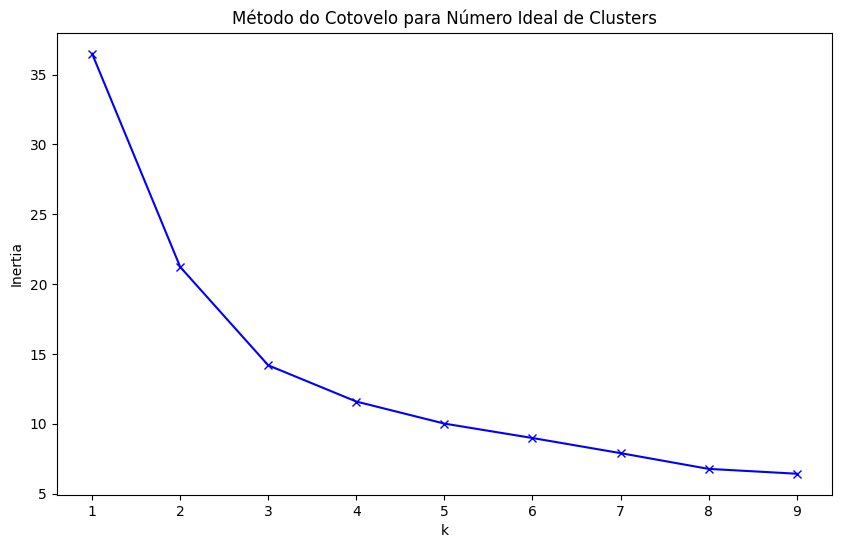


Média das características por cluster:
         instrumentalness  acousticness  speechiness  danceability
Cluster                                                           
0                0.010388      0.035137     0.204875      0.427182
1                0.004637      0.082587     0.342810      0.664032
2                0.005978      0.251809     0.427909      0.463515
3                0.763423      0.035523     0.077600      0.624192
4                0.005771      0.490370     0.149743      0.497065
5                0.012182      0.072082     0.088510      0.702276
6                0.603500      0.660750     0.053850      0.538500


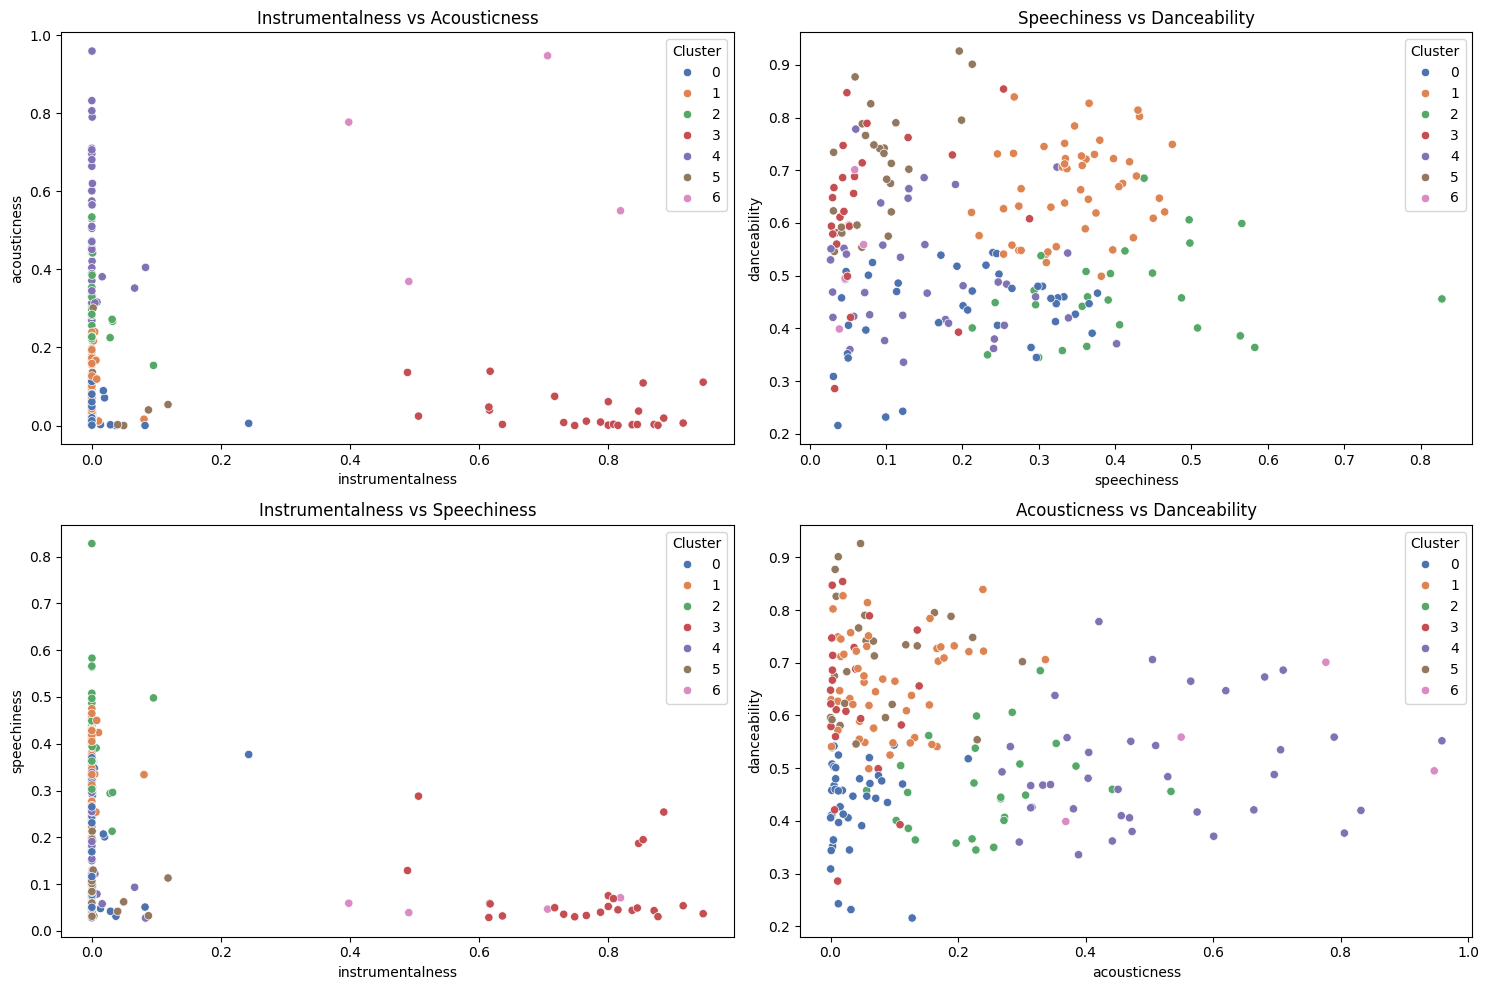


Centroides dos clusters:
   instrumentalness  acousticness  speechiness  danceability
0          0.010388      0.035137     0.204875      0.427182
1          0.004637      0.082587     0.342810      0.664032
2          0.005978      0.251809     0.427909      0.463515
3          0.763423      0.035523     0.077600      0.624192
4          0.005771      0.490370     0.149743      0.497065
5          0.012182      0.072082     0.088510      0.702276
6          0.603500      0.660750     0.053850      0.538500

Cluster 0 - Exemplo de músicas:
                track_name album_name  instrumentalness  acousticness  \
4    ARE WE STILL FRIENDS?       IGOR          0.000002       0.12800   
5   GONE, GONE / THANK YOU       IGOR          0.001200       0.21600   
14                  Answer       Wolf          0.000006       0.00329   

    speechiness  danceability  
4        0.0371         0.216  
5        0.1930         0.518  
14       0.0496         0.352  

Cluster 1 - Exemplo de músicas:

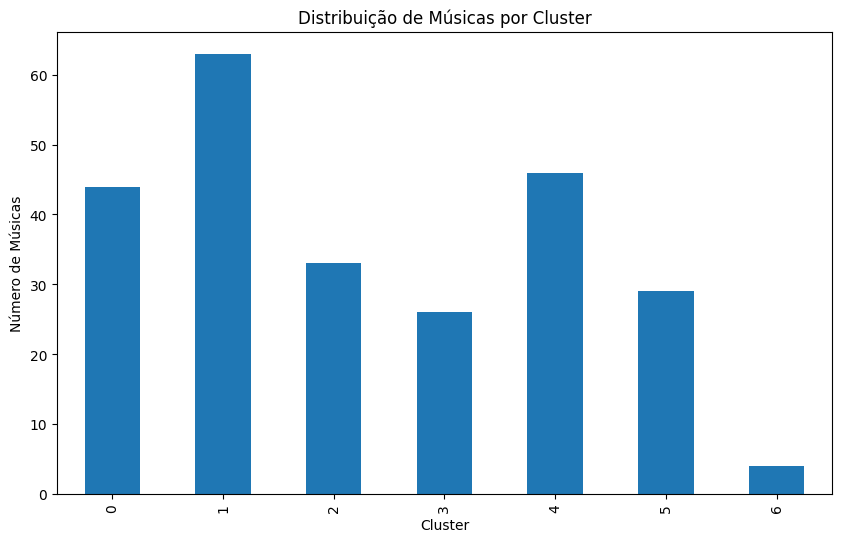

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('Tyler The Creator Dataset.csv')

# Selecionar as variáveis para clusterização
features = ['instrumentalness', 'acousticness', 'speechiness', 'danceability']
X = df[features]

# Encontrar o número ideal de clusters usando o método do cotovelo
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo para Número Ideal de Clusters')
plt.show()

# Aplicar K-means com 7 clusters
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Análise dos clusters
cluster_means = df.groupby('Cluster')[features].mean()
print("\nMédia das características por cluster:")
print(cluster_means)

# Visualização dos clusters em pares de variáveis
plt.figure(figsize=(15, 10))

# Plot 1: instrumentalness vs acousticness
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='instrumentalness', y='acousticness', hue='Cluster', palette='deep')
plt.title('Instrumentalness vs Acousticness')

# Plot 2: speechiness vs danceability
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='speechiness', y='danceability', hue='Cluster', palette='deep')
plt.title('Speechiness vs Danceability')

# Plot 3: instrumentalness vs speechiness
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='instrumentalness', y='speechiness', hue='Cluster', palette='deep')
plt.title('Instrumentalness vs Speechiness')

# Plot 4: acousticness vs danceability
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='acousticness', y='danceability', hue='Cluster', palette='deep')
plt.title('Acousticness vs Danceability')

plt.tight_layout()
plt.show()

# Mostrar os centroides
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("\nCentroides dos clusters:")
print(centroids)

# Análise das músicas em cada cluster
for cluster in range(n_clusters):
    print(f"\nCluster {cluster} - Exemplo de músicas:")
    cluster_songs = df[df['Cluster'] == cluster][['track_name', 'album_name'] + features].head(3)
    print(cluster_songs)

# Análise adicional: Distribuição de músicas por cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nNúmero de músicas por cluster:")
print(cluster_sizes)

# Visualizar a distribuição de músicas por cluster
plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='bar')
plt.title('Distribuição de Músicas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Músicas')
plt.show()

###Featurin Scale

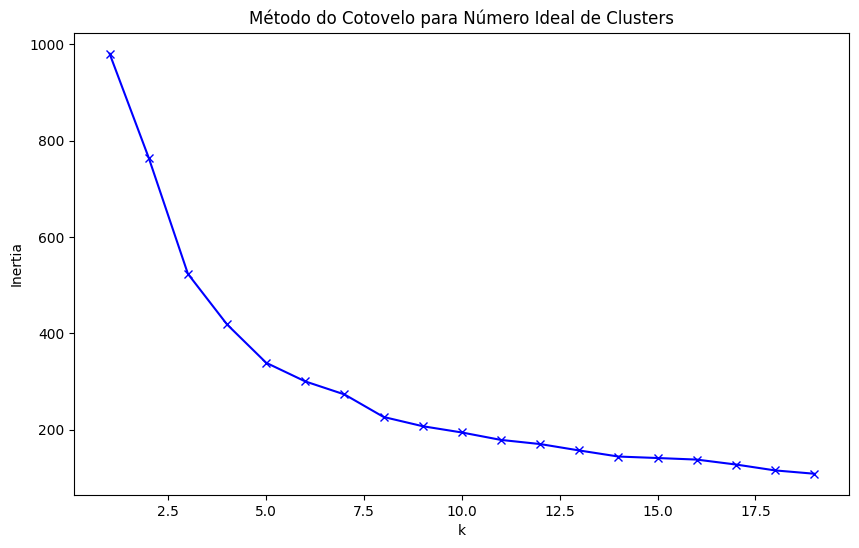


Média das características por cluster:
         instrumentalness  acousticness  speechiness  danceability
Cluster                                                           
0                0.010507      0.096998     0.072184      0.467368
1                0.004930      0.194395     0.519571      0.519905
2                0.007595      0.086671     0.302731      0.482192
3                0.765481      0.054578     0.077348      0.621778
4                0.002047      0.451667     0.244663      0.426259
5                0.006281      0.087333     0.272583      0.730417
6                0.091516      0.604450     0.098760      0.583300


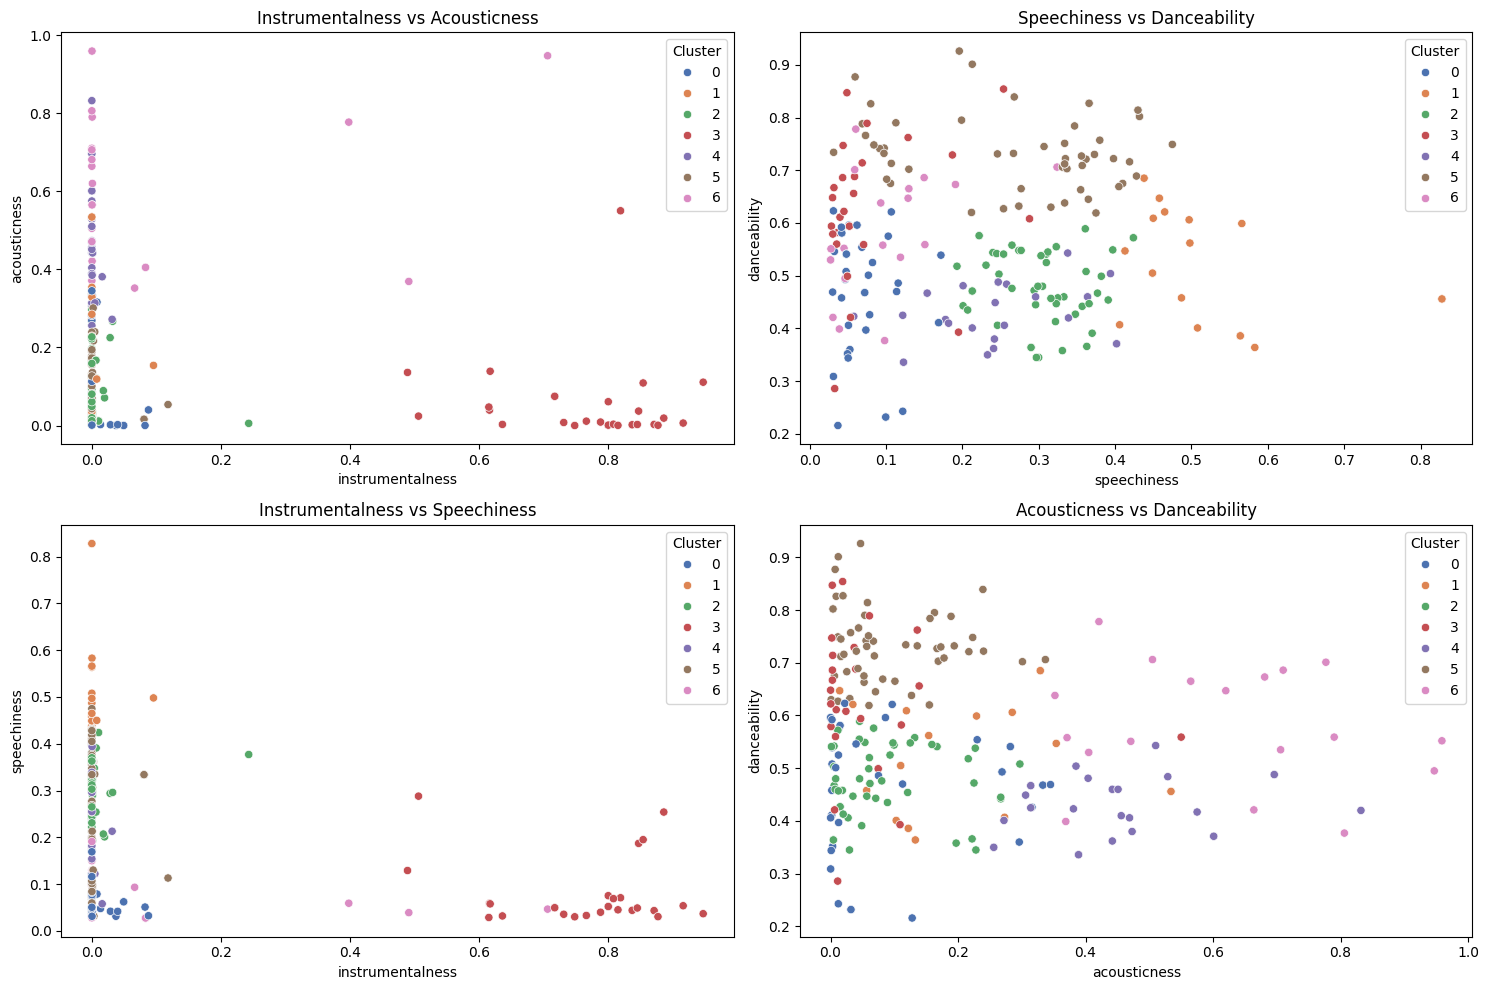


Centroides dos clusters:
   instrumentalness  acousticness  speechiness  danceability
0          0.010507      0.096998     0.072184      0.467368
1          0.004930      0.194395     0.519571      0.519905
2          0.007595      0.086671     0.302731      0.482192
3          0.765481      0.054578     0.077348      0.621778
4          0.002047      0.451667     0.244663      0.426259
5          0.006281      0.087333     0.272583      0.730417
6          0.091516      0.604450     0.098760      0.583300

Cluster 0 - Exemplo de músicas:
              track_name     album_name  instrumentalness  acousticness  \
0              EARFQUAKE           IGOR          0.000006        0.2300   
3          BEST INTEREST  BEST INTEREST          0.000153        0.0861   
4  ARE WE STILL FRIENDS?           IGOR          0.000002        0.1280   

   speechiness  danceability  
0       0.0685         0.554  
3       0.0514         0.596  
4       0.0371         0.216  

Cluster 1 - Exemplo de músi

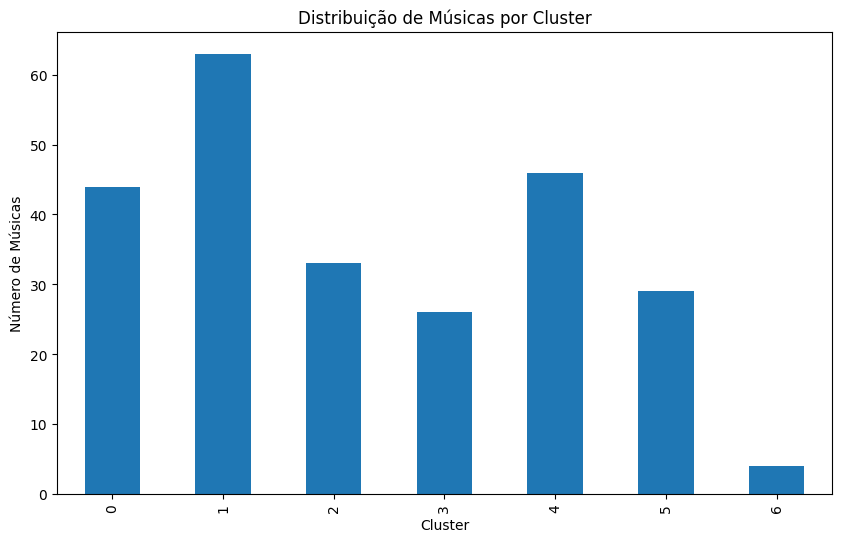

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('Tyler The Creator Dataset.csv')

# Selecionar as variáveis para clusterização
features = ['instrumentalness', 'acousticness', 'speechiness', 'danceability']
X = df[features]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar o número ideal de clusters usando o método do cotovelo
inertias = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo para Número Ideal de Clusters')
plt.show()

# Aplicar K-means com o número escolhido de clusters (neste caso, usaremos 4)
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Análise dos clusters
cluster_means = df.groupby('Cluster')[features].mean()
print("\nMédia das características por cluster:")
print(cluster_means)

# Visualização dos clusters em pares de variáveis
plt.figure(figsize=(15, 10))

# Plot 1: instrumentalness vs acousticness
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='instrumentalness', y='acousticness', hue='Cluster', palette='deep')
plt.title('Instrumentalness vs Acousticness')

# Plot 2: speechiness vs danceability
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='speechiness', y='danceability', hue='Cluster', palette='deep')
plt.title('Speechiness vs Danceability')

# Plot 3: instrumentalness vs speechiness
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='instrumentalness', y='speechiness', hue='Cluster', palette='deep')
plt.title('Instrumentalness vs Speechiness')

# Plot 4: acousticness vs danceability
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='acousticness', y='danceability', hue='Cluster', palette='deep')
plt.title('Acousticness vs Danceability')

plt.tight_layout()
plt.show()

# Adicionar os centroides normalizados ao dataframe
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=features)
centroids = pd.DataFrame(scaler.inverse_transform(centroids_scaled), columns=features)
print("\nCentroides dos clusters:")
print(centroids)

# Análise das músicas em cada cluster
for cluster in range(n_clusters):
    print(f"\nCluster {cluster} - Exemplo de músicas:")
    cluster_songs = df[df['Cluster'] == cluster][['track_name', 'album_name'] + features].head(3)
    print(cluster_songs)

# Visualizar a distribuição de músicas por cluster
plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='bar')
plt.title('Distribuição de Músicas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Músicas')
plt.show()

###PCA

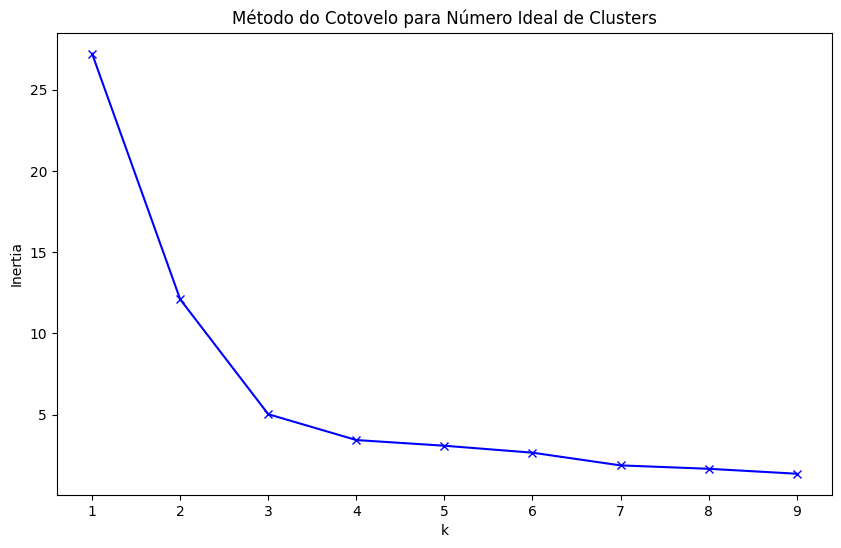


Média das características por cluster:
         instrumentalness  acousticness  speechiness  danceability
Cluster                                                           
0                0.020332      0.042610     0.118853      0.586412
1                0.763423      0.035523     0.077600      0.624192
2                0.000078      0.754000     0.161800      0.519900
3                0.006675      0.474821     0.238054      0.489679
4                0.001716      0.067453     0.357965      0.581488
5                0.004826      0.272425     0.226437      0.508300
6                0.603500      0.660750     0.053850      0.538500


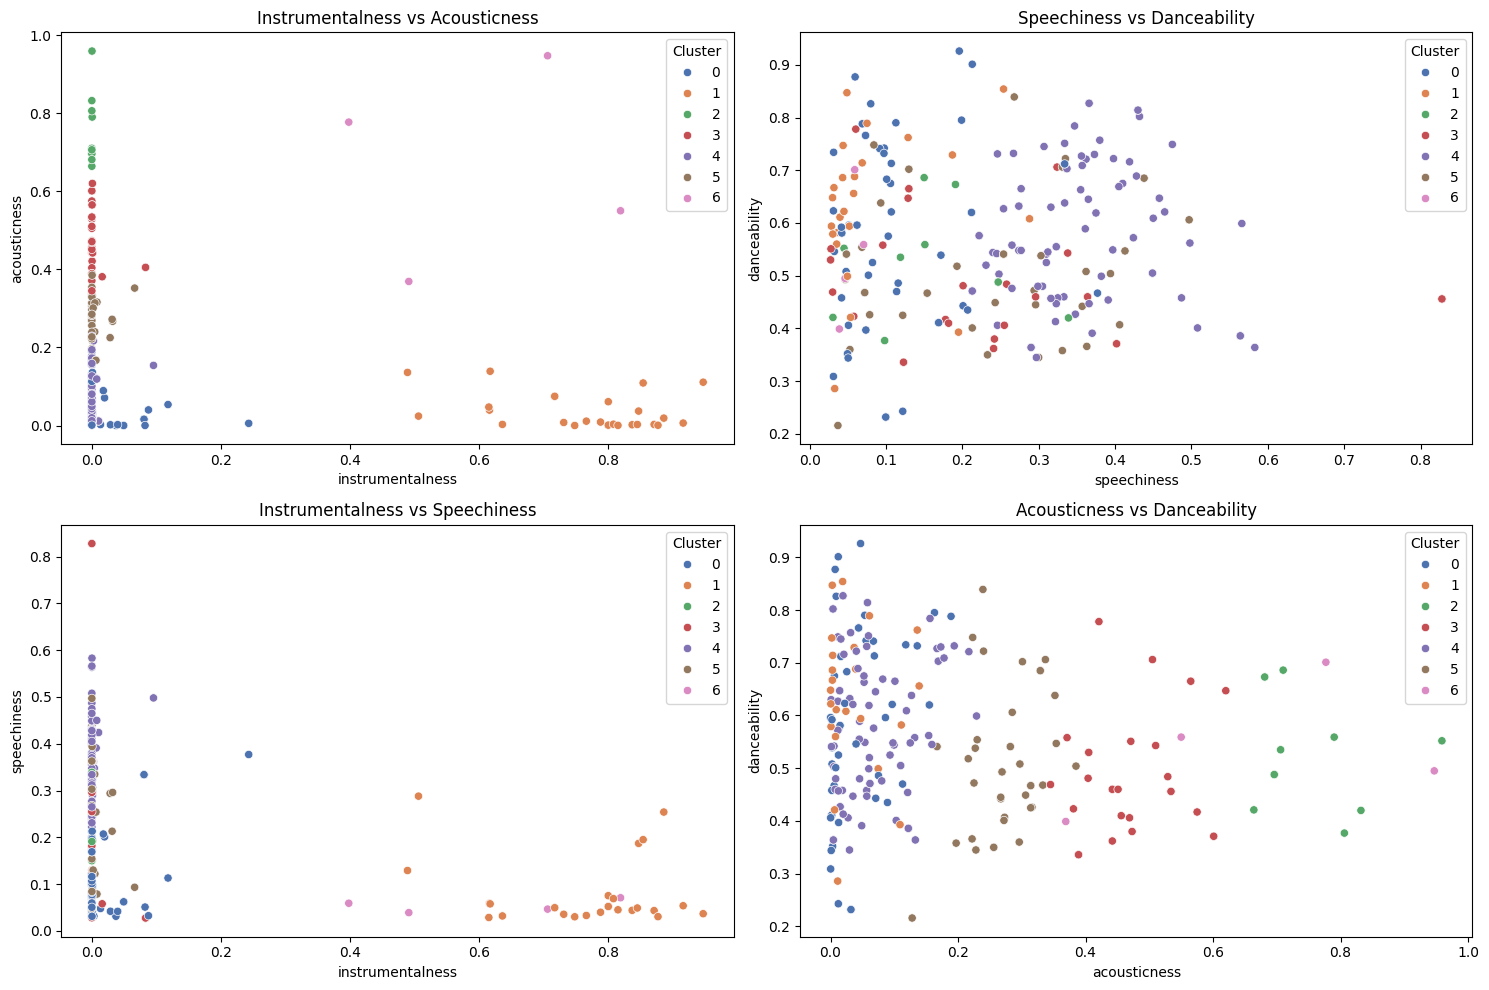


Centroides dos clusters:
      PCA 1     PCA 2
0  0.002777 -0.121246
1  0.695799  0.049106
2 -0.233759  0.535594
3 -0.176002  0.266425
4 -0.091018 -0.156567
5 -0.115826  0.077680
6  0.373458  0.612131

Cluster 0 - Exemplo de músicas:
       track_name     album_name  instrumentalness  acousticness  speechiness  \
3   BEST INTEREST  BEST INTEREST          0.000153       0.08610       0.0514   
6  NEW MAGIC WAND           IGOR          0.000131       0.09670       0.1070   
7         I THINK           IGOR          0.000000       0.00881       0.0801   

   danceability  
3         0.596  
6         0.621  
7         0.826  

Cluster 1 - Exemplo de músicas:
                track_name  album_name  instrumentalness  acousticness  \
29  Enjoy Right Now, Today  Flower Boy             0.847        0.0370   
83                    AU79      Goblin             0.717        0.0748   
93             Untitled 63      Goblin             0.947        0.1110   

    speechiness  danceability  
29    

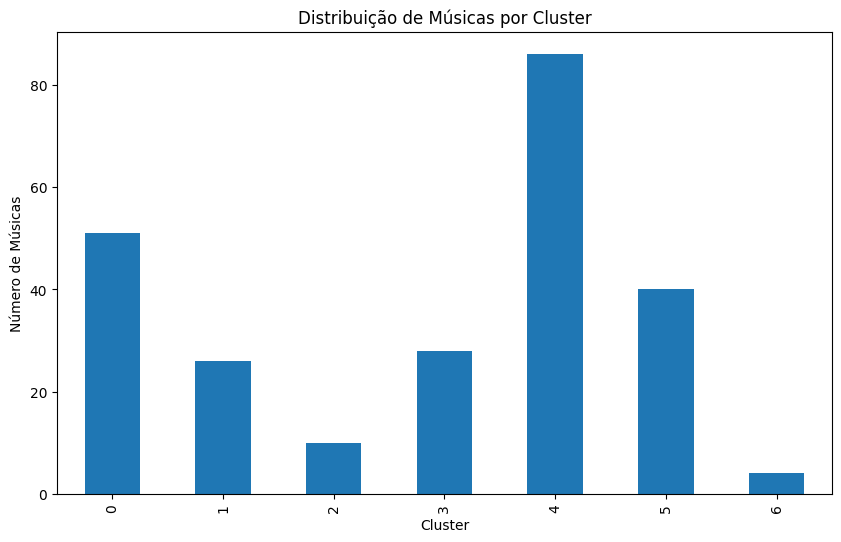

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('Tyler The Creator Dataset.csv')

# Selecionar as variáveis para clusterização
features = ['instrumentalness', 'acousticness', 'speechiness', 'danceability']
X = df[features]

# Aplicar PCA para reduzir a dimensionalidade (n_components=2 para visualização)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Encontrar o número ideal de clusters usando o método do cotovelo
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo para Número Ideal de Clusters')
plt.show()

# Aplicar K-means com 7 clusters
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

# Análise dos clusters
cluster_means = df.groupby('Cluster')[features].mean()
print("\nMédia das características por cluster:")
print(cluster_means)

# Visualização dos clusters em pares de variáveis
plt.figure(figsize=(15, 10))

# Plot 1: instrumentalness vs acousticness
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='instrumentalness', y='acousticness', hue='Cluster', palette='deep')
plt.title('Instrumentalness vs Acousticness')

# Plot 2: speechiness vs danceability
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='speechiness', y='danceability', hue='Cluster', palette='deep')
plt.title('Speechiness vs Danceability')

# Plot 3: instrumentalness vs speechiness
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='instrumentalness', y='speechiness', hue='Cluster', palette='deep')
plt.title('Instrumentalness vs Speechiness')

# Plot 4: acousticness vs danceability
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='acousticness', y='danceability', hue='Cluster', palette='deep')
plt.title('Acousticness vs Danceability')

plt.tight_layout()
plt.show()

# Mostrar os centroides
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['PCA 1', 'PCA 2'])
print("\nCentroides dos clusters:")
print(centroids)

# Análise das músicas em cada cluster
for cluster in range(n_clusters):
    print(f"\nCluster {cluster} - Exemplo de músicas:")
    cluster_songs = df[df['Cluster'] == cluster][['track_name', 'album_name'] + features].head(3)
    print(cluster_songs)

# Análise adicional: Distribuição de músicas por cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nNúmero de músicas por cluster:")
print(cluster_sizes)

# Visualizar a distribuição de músicas por cluster
plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='bar')
plt.title('Distribuição de Músicas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Músicas')
plt.show()


##DBSCAN

###Contexto
Este projeto utiliza o algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para realizar a clusterização das músicas de Tyler The Creator com base nas características de "instrumentalness", "acousticness", "speechiness" e "danceability". O DBSCAN é um algoritmo de aprendizado não supervisionado que agrupa pontos de dados com base na densidade, identificando regiões de alta densidade como clusters e pontos com baixa densidade como ruído. Esse algoritmo é particularmente útil para identificar clusters de formas arbitrárias e é resistente à presença de outliers, tornando-o adequado para a análise das músicas de Tyler The Creator sem a necessidade de especificar o número de clusters antecipadamente.

###Descrição do Código
Carregamento e Preparação dos Dados:
O primeiro passo do código é carregar o dataset contendo as informações sobre as músicas de Tyler The Creator. A seguir, são selecionadas as características relevantes para a análise de clusterização, que são "instrumentalness", "acousticness", "speechiness" e "danceability", representando diferentes aspectos da música, como a presença de instrumentos, a acústica, os vocais e o ritmo dançante. Para garantir que todas as características tenham igual peso na análise, os dados são normalizados utilizando o StandardScaler. A normalização é importante para evitar que características com escalas maiores dominem a análise, já que o DBSCAN é sensível às escalas das variáveis.
Aplicação do DBSCAN:
Em seguida, o algoritmo DBSCAN é aplicado diretamente aos dados normalizados. Os parâmetros principais do DBSCAN são:
eps (epsilon): Define a distância máxima entre dois pontos para que eles sejam considerados vizinhos.
min_samples: O número mínimo de pontos necessário em uma região densa para que ela seja considerada um cluster.
O DBSCAN agrupa os pontos com base na densidade local e rotula os pontos que não pertencem a nenhum cluster denso como ruído, atribuindo a eles o valor -1. Este comportamento do DBSCAN é útil para identificar músicas que não se encaixam em nenhum padrão denso, considerando-as como outliers.
Determinação dos Parâmetros:
Para determinar o valor ideal de eps, é utilizado o gráfico de k-distances, que ajuda a escolher a distância correta para que um ponto seja considerado vizinho de outro. O valor de min_samples é ajustado de acordo com a natureza dos dados, sendo comumente escolhido como 4, pois se baseia na ideia de que uma região densa precisa ter pelo menos esse número de pontos para ser considerada um cluster.
Visualizações:
O código gera vários gráficos para ajudar na interpretação dos resultados:
Gráficos de dispersão: São criados gráficos de dispersão entre diferentes pares de características, como "instrumentalness vs. acousticness" e "speechiness vs. danceability", utilizando cores diferentes para cada cluster. Isso ajuda a visualizar como os clusters estão distribuídos em relação às características musicais selecionadas.
Distribuição de clusters: Um gráfico de barras é gerado para mostrar a quantidade de músicas em cada cluster, permitindo observar a distribuição e o equilíbrio entre os grupos formados.
Interpretação dos Clusters:
Por fim, a análise dos centroides e das médias das características por cluster permite compreender os padrões específicos de cada grupo. O código também seleciona algumas músicas representativas de cada cluster para exemplificar as características típicas de cada grupo, ajudando a entender melhor os perfis musicais identificados pelo DBSCAN.

###Conclusão:
O uso do DBSCAN neste projeto permite a clusterização das músicas de Tyler The Creator de forma flexível, sem a necessidade de especificar o número de clusters, e é eficaz na identificação de padrões de músicas com características semelhantes. Além disso, o algoritmo é capaz de identificar músicas que não se encaixam bem em nenhum cluster denso, tratando-as como ruído e proporcionando uma análise mais robusta e detalhada.

###Sem nada


Média das características por cluster:
         instrumentalness  acousticness  speechiness  danceability
Cluster                                                           
-1               0.402333      0.618500     0.311900      0.511000
 0               0.007348      0.181399     0.246627      0.555141
 1               0.763423      0.035523     0.077600      0.624192


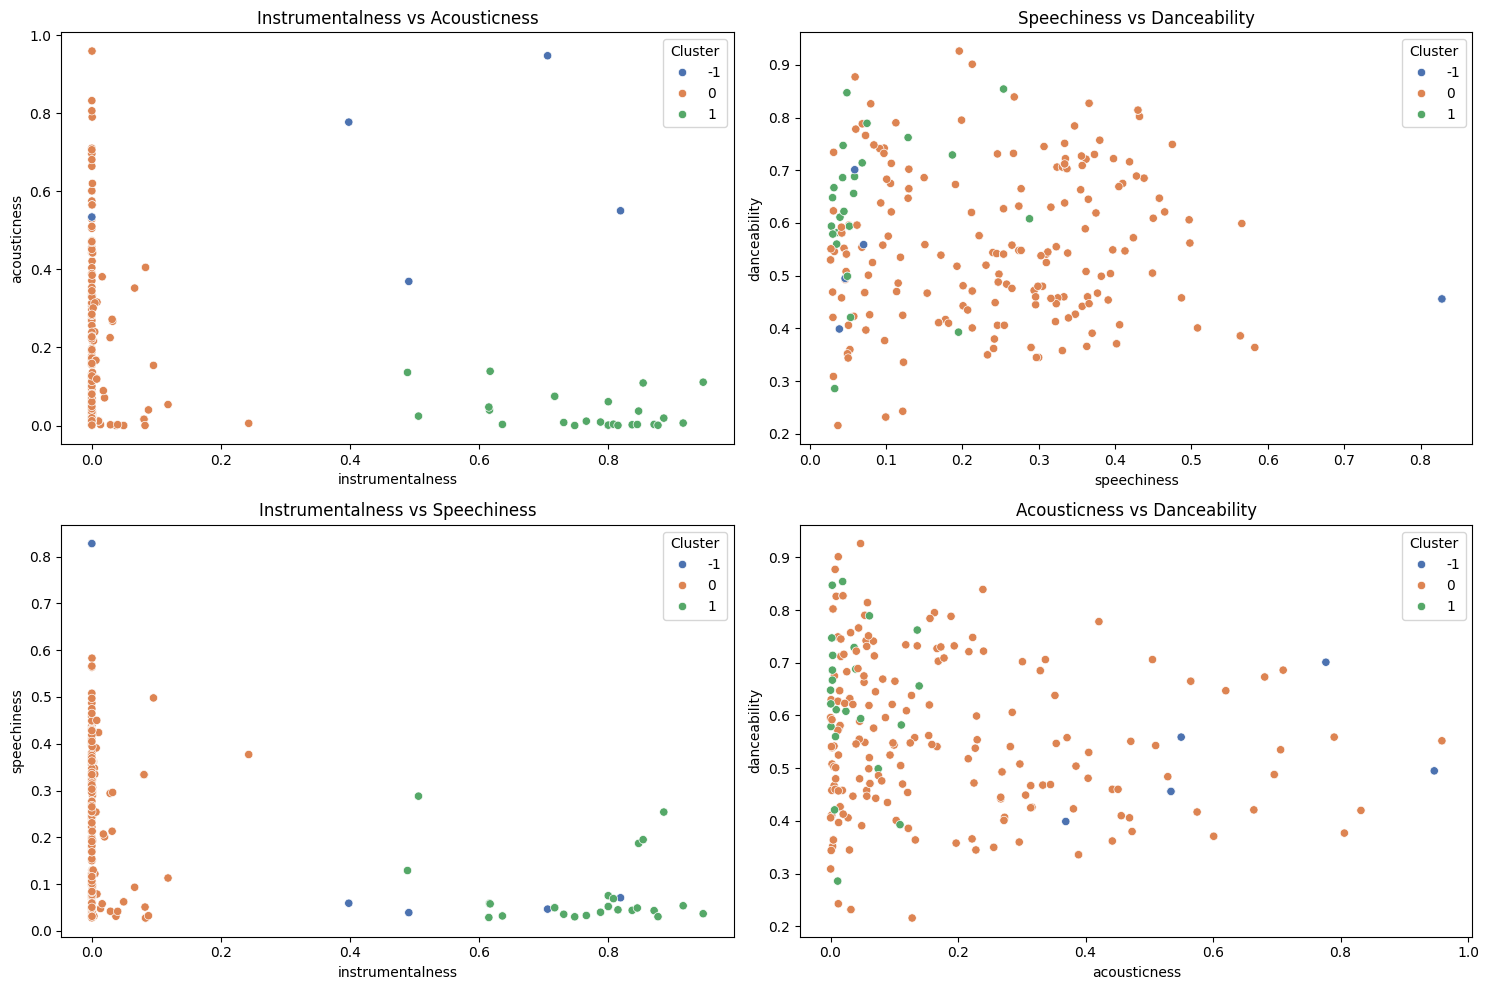


Cluster 0 - Exemplo de músicas:
                         track_name  album_name  instrumentalness  \
0                         EARFQUAKE        IGOR          0.000006   
1  See You Again (feat. Kali Uchis)  Flower Boy          0.000007   
2                              Noid        Noid          0.000151   

   acousticness  speechiness  danceability  
0         0.230       0.0685         0.554  
1         0.371       0.0959         0.558  
2         0.473       0.2420         0.380  

Cluster 1 - Exemplo de músicas:
                track_name  album_name  instrumentalness  acousticness  \
29  Enjoy Right Now, Today  Flower Boy             0.847        0.0370   
83                    AU79      Goblin             0.717        0.0748   
93             Untitled 63      Goblin             0.947        0.1110   

    speechiness  danceability  
29       0.1870         0.729  
83       0.0495         0.499  
93       0.0367         0.582  

Cluster -1 - Exemplo de músicas:
              trac

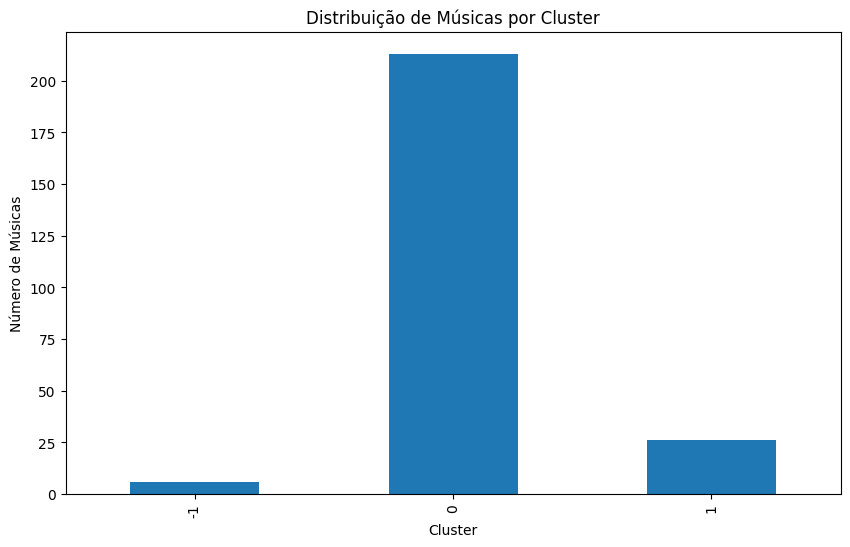

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('Tyler The Creator Dataset.csv')

# Selecionar as variáveis para clusterização
features = ['instrumentalness', 'acousticness', 'speechiness', 'danceability']
X = df[features]

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X)

# Análise dos clusters
cluster_means = df.groupby('Cluster')[features].mean()
print("\nMédia das características por cluster:")
print(cluster_means)

# Visualização dos clusters em pares de variáveis
plt.figure(figsize=(15, 10))

# Plot 1: instrumentalness vs acousticness
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='instrumentalness', y='acousticness', hue='Cluster', palette='deep')
plt.title('Instrumentalness vs Acousticness')

# Plot 2: speechiness vs danceability
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='speechiness', y='danceability', hue='Cluster', palette='deep')
plt.title('Speechiness vs Danceability')

# Plot 3: instrumentalness vs speechiness
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='instrumentalness', y='speechiness', hue='Cluster', palette='deep')
plt.title('Instrumentalness vs Speechiness')

# Plot 4: acousticness vs danceability
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='acousticness', y='danceability', hue='Cluster', palette='deep')
plt.title('Acousticness vs Danceability')

plt.tight_layout()
plt.show()

# Análise das músicas em cada cluster
for cluster in set(df['Cluster']):
    print(f"\nCluster {cluster} - Exemplo de músicas:")
    cluster_songs = df[df['Cluster'] == cluster][['track_name', 'album_name'] + features].head(3)
    print(cluster_songs)

# Análise adicional: Distribuição de músicas por cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nNúmero de músicas por cluster:")
print(cluster_sizes)

# Visualizar a distribuição de músicas por cluster
plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='bar')
plt.title('Distribuição de Músicas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Músicas')
plt.show()


###Featuring Scale


Média das características por cluster:
         instrumentalness  acousticness  speechiness  danceability
Cluster                                                           
-1               0.114855      0.194928     0.228606      0.556845
 0               0.000172      0.055920     0.088640      0.745600
 1               0.000819      0.023347     0.328500      0.449600
 2               0.001006      0.187571     0.351000      0.716429
 3               0.001151      0.112445     0.260091      0.547455
 4               0.023233      0.009078     0.046917      0.594833


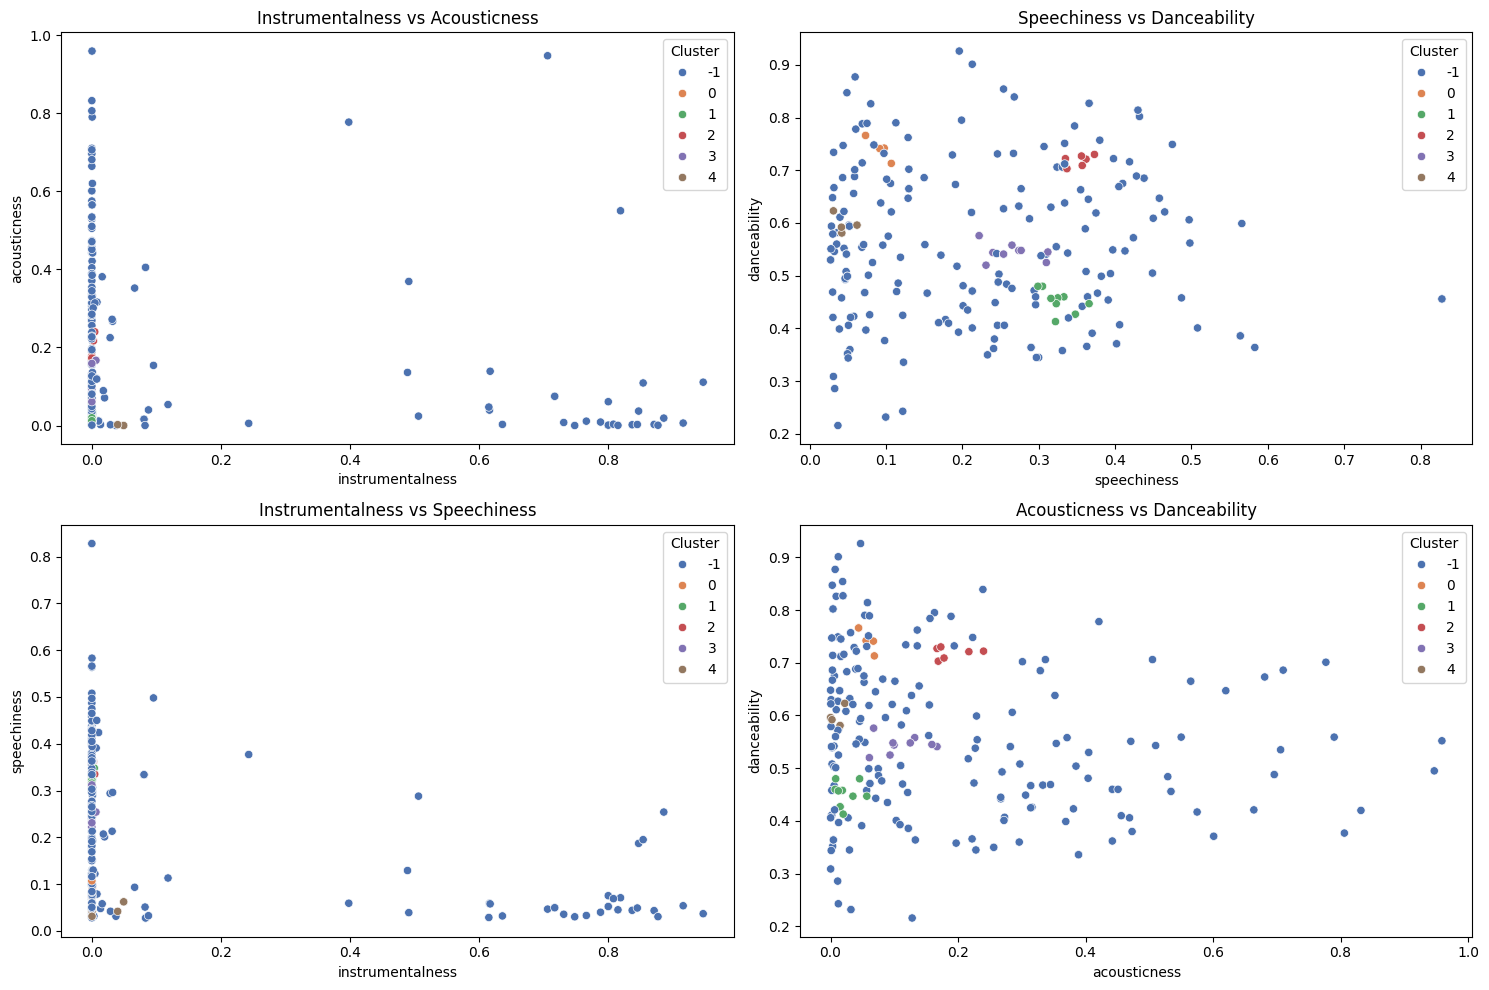


Cluster 0 - Exemplo de músicas:
                   track_name                                album_name  \
12                     Tamale                                      Wolf   
49  RISE! (feat. DAISY WORLD)                   CALL ME IF YOU GET LOST   
82  RISE! (feat. DAISY WORLD)  CALL ME IF YOU GET LOST: The Estate Sale   

    instrumentalness  acousticness  speechiness  danceability  
12          0.000242        0.0557       0.0977         0.742  
49          0.000011        0.0440       0.0733         0.766  
82          0.000011        0.0440       0.0733         0.766  

Cluster 1 - Exemplo de músicas:
                                            track_name   album_name  \
17   911 / Mr. Lonely (feat. Frank Ocean & Steve Lacy)   Flower Boy   
39             SMUCKERS (feat. Lil Wayne & Kanye West)  Cherry Bomb   
107  Trashwang (feat. Na-Kel Smith, Jasper Dolphin,...         Wolf   

     instrumentalness  acousticness  speechiness  danceability  
17            0.00000      

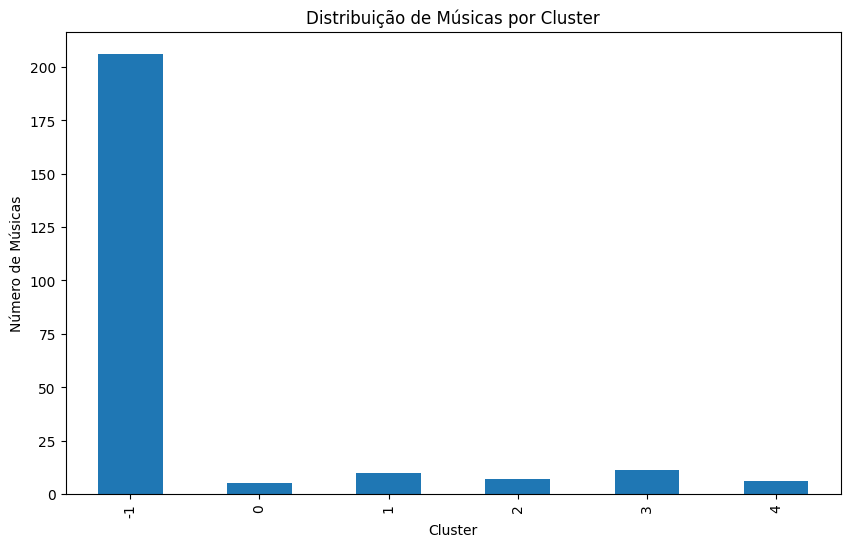

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('Tyler The Creator Dataset.csv')

# Selecionar as variáveis para clusterização
features = ['instrumentalness', 'acousticness', 'speechiness', 'danceability']
X = df[features]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_scaled)

# Análise dos clusters
cluster_means = df.groupby('Cluster')[features].mean()
print("\nMédia das características por cluster:")
print(cluster_means)

# Visualização dos clusters em pares de variáveis
plt.figure(figsize=(15, 10))

# Plot 1: instrumentalness vs acousticness
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='instrumentalness', y='acousticness', hue='Cluster', palette='deep')
plt.title('Instrumentalness vs Acousticness')

# Plot 2: speechiness vs danceability
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='speechiness', y='danceability', hue='Cluster', palette='deep')
plt.title('Speechiness vs Danceability')

# Plot 3: instrumentalness vs speechiness
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='instrumentalness', y='speechiness', hue='Cluster', palette='deep')
plt.title('Instrumentalness vs Speechiness')

# Plot 4: acousticness vs danceability
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='acousticness', y='danceability', hue='Cluster', palette='deep')
plt.title('Acousticness vs Danceability')

plt.tight_layout()
plt.show()

# Análise das músicas em cada cluster
for cluster in set(df['Cluster']):
    print(f"\nCluster {cluster} - Exemplo de músicas:")
    cluster_songs = df[df['Cluster'] == cluster][['track_name', 'album_name'] + features].head(3)
    print(cluster_songs)

# Análise adicional: Distribuição de músicas por cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nNúmero de músicas por cluster:")
print(cluster_sizes)

# Visualizar a distribuição de músicas por cluster
plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='bar')
plt.title('Distribuição de Músicas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Músicas')
plt.show()


###PCA


Média das características por cluster:
         instrumentalness  acousticness  speechiness  danceability
Cluster                                                           
-1               0.603500      0.660750     0.053850      0.538500
 0               0.088856      0.168588     0.233216      0.561768


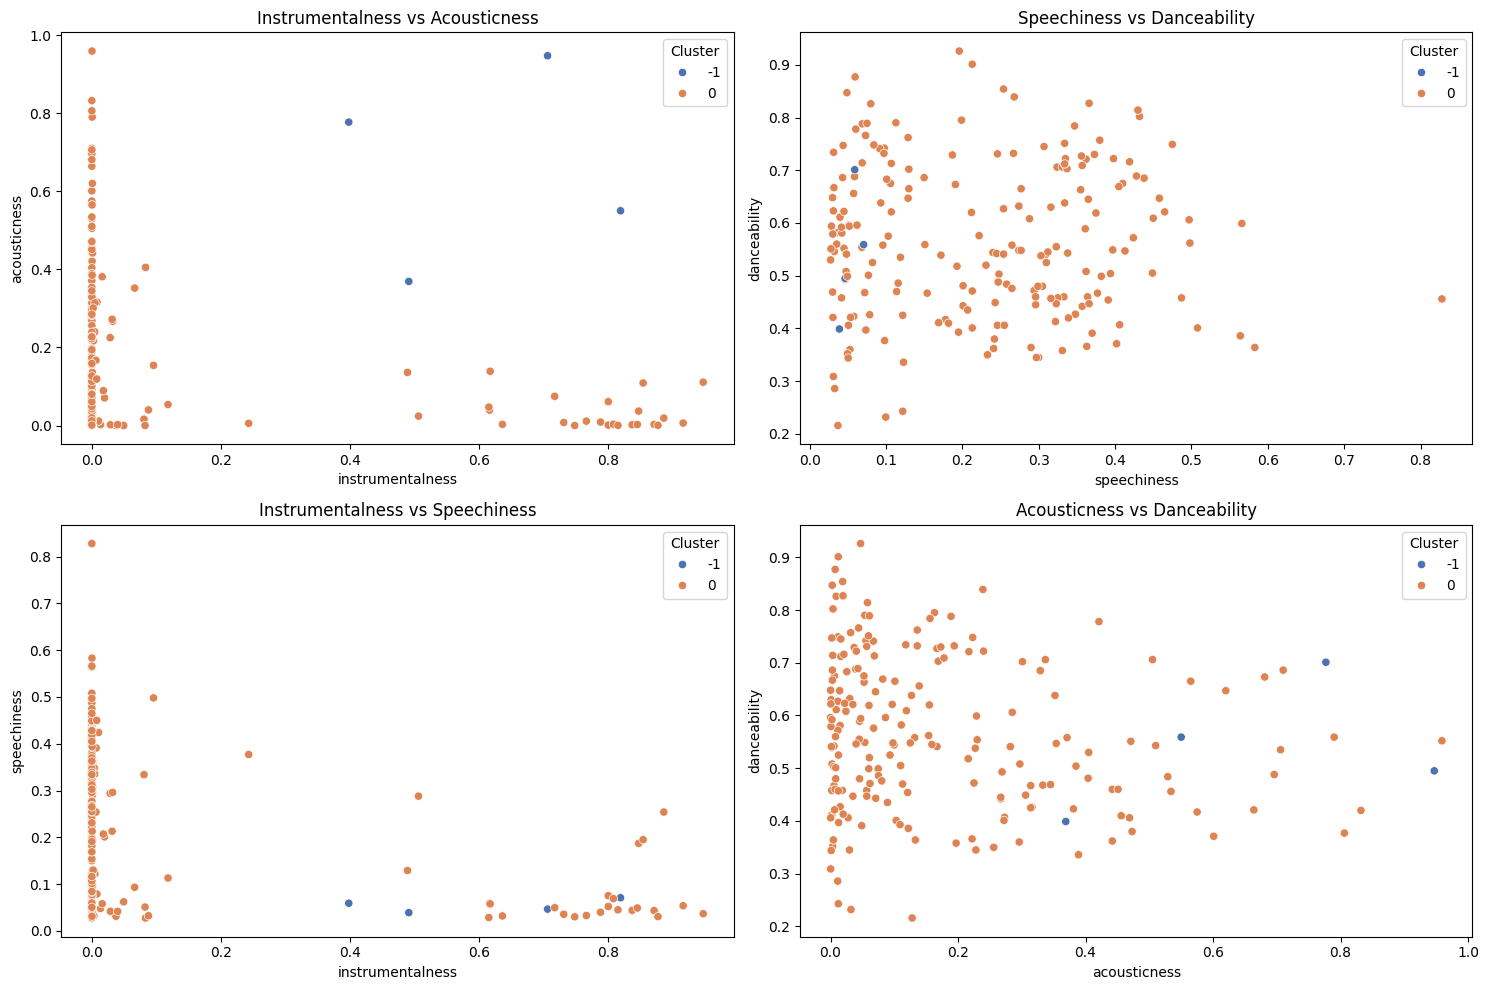


Cluster 0 - Exemplo de músicas:
                         track_name  album_name  instrumentalness  \
0                         EARFQUAKE        IGOR          0.000006   
1  See You Again (feat. Kali Uchis)  Flower Boy          0.000007   
2                              Noid        Noid          0.000151   

   acousticness  speechiness  danceability  
0         0.230       0.0685         0.554  
1         0.371       0.0959         0.558  
2         0.473       0.2420         0.380  

Cluster -1 - Exemplo de músicas:
                 track_name  \
109                Whoville   
118     Lone - Instrumental   
135  Awkward - Instrumental   

                                            album_name  instrumentalness  \
109  Music Inspired by Illumination & Dr. Seuss' Th...             0.706   
118                               Wolf + Instrumentals             0.491   
135                               Wolf + Instrumentals             0.819   

     acousticness  speechiness  danceability  

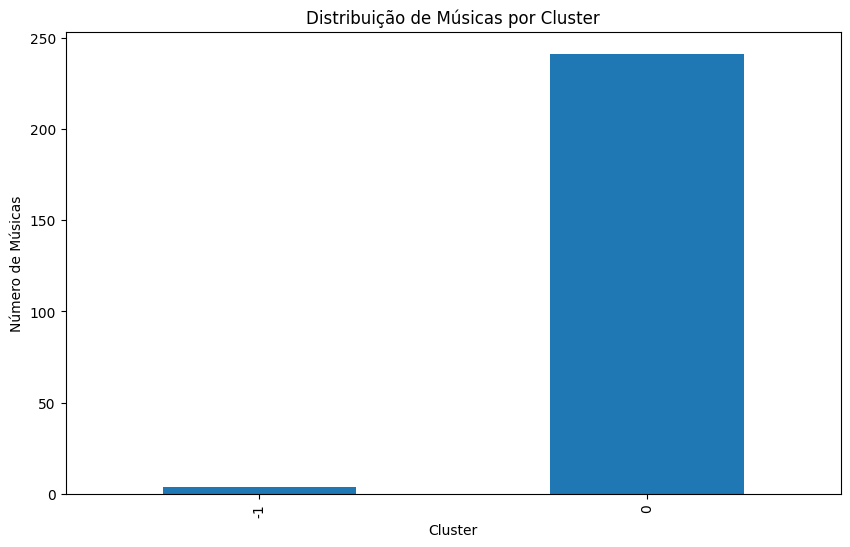

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('Tyler The Creator Dataset.csv')

# Selecionar as variáveis para clusterização
features = ['instrumentalness', 'acousticness', 'speechiness', 'danceability']
X = df[features]

# Aplicar PCA para reduzir a dimensionalidade (n_components=2 para visualização)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Aplicar DBSCAN nos dados reduzidos
dbscan = DBSCAN(eps=0.3, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_pca)

# Análise dos clusters
cluster_means = df.groupby('Cluster')[features].mean()
print("\nMédia das características por cluster:")
print(cluster_means)

# Visualização dos clusters em pares de variáveis
plt.figure(figsize=(15, 10))

# Plot 1: instrumentalness vs acousticness
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='instrumentalness', y='acousticness', hue='Cluster', palette='deep')
plt.title('Instrumentalness vs Acousticness')

# Plot 2: speechiness vs danceability
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='speechiness', y='danceability', hue='Cluster', palette='deep')
plt.title('Speechiness vs Danceability')

# Plot 3: instrumentalness vs speechiness
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='instrumentalness', y='speechiness', hue='Cluster', palette='deep')
plt.title('Instrumentalness vs Speechiness')

# Plot 4: acousticness vs danceability
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='acousticness', y='danceability', hue='Cluster', palette='deep')
plt.title('Acousticness vs Danceability')

plt.tight_layout()
plt.show()

# Análise das músicas em cada cluster
for cluster in set(df['Cluster']):
    print(f"\nCluster {cluster} - Exemplo de músicas:")
    cluster_songs = df[df['Cluster'] == cluster][['track_name', 'album_name'] + features].head(3)
    print(cluster_songs)

# Análise adicional: Distribuição de músicas por cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nNúmero de músicas por cluster:")
print(cluster_sizes)

# Visualizar a distribuição de músicas por cluster
plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='bar')
plt.title('Distribuição de Músicas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Músicas')
plt.show()


##Conclusão
Esta análise demonstra a versatilidade artística de Tyler The Creator, revelando como ele transita entre diferentes estilos musicais. Seu catálogo abrange desde músicas altamente instrumentais até faixas focadas em vocais, com variações significativas em danceability e elementos acústicos. A presença de clusters bem definidos sugere uma abordagem consciente na produção musical, onde diferentes combinações de elementos são utilizadas para criar experiências sonoras distintas.
A diversidade dos clusters também reflete a evolução artística de Tyler, com músicas de diferentes álbuns e eras aparecendo em vários grupos, indicando uma consistente experimentação com diferentes estilos e elementos musicais ao longo de sua carreira.